## Homework #5. Exploratory Data Analysis
#### Author: `Oleksandra Chumachenko`
#### Total time spent on h/w (in minutes): `1920`

#### Table of content
1. Media (video/audio messages) listen/unlisten
    1. From private dialogs and groups
       - знайти частку прослуханих та непрослуханих відео повідомлень та голосвих повідомлень відправлених та отриманих в приватних діалогах і групах.
    1. From channels and supergroup
        - знайти частку прослуханих та непрослуханих відео повідомлень та голосвих повідомлень відправлених та отриманих в каналах і супергрупах.
1. Edited/not edited message
    1. Edited messages overview 
        - знайти частку редагованих повідомленнь в приватних діалогах та групах і супергрупах та каналах.
    1. Find in what day of the week edited messages are more often
       - знайти абсолютний розподіл редагованих повідомлень в залежності від дня тижня
    1. Mean value
       - знайти розподіл середнього числа редагованих повідомлень в залежності від дня тижня
    1. Mean of all messages
       - знайти середнє число всіх повідомлень в залежності від дня тижня
    1. Edit / all
       - знайти відносний розподіл середнього значення редагованих повідомлень повідомлень в залежності від дня тижня
    1. Message distribution (absolute) by day per year
       - знайти абсолютний розподіл відправлених повідомлень в залежності від дня тижня для кожного року
    1. Message distribution (mean) by day per year
       - знайти розподіл середнього відправлених повідомлень в залежності від дня тижня для кожного року
    1. Most popular time to send by year
       - знайти найпопулярніший час відправлення повідомлень
       - знайти найпопулярніший час відправлення повідомлень відносно року
    1. Most popular time to send by month
        - знайти найпопулярніший час відправлення повідомлень відносно місяців 2022 року
1. Reactions
    - визначити найпопулярнішу реакцію
1. Some dialogs analysis
    1. Dialog message distribution by day of the week
        - переглянути частоту повідомлень відносно дня тижня з найпопулярнішими діалогами
    1. Dialog message distribution by hour
        -  переглянути частоту повідомлень відносно години з найпопулярнішими діалогами
1. Work with text
   1. Sended
       1. А
           - знайти частоту уживання деяких дієслів
           - проаналізувати чи вживається це слово з часткою не частіше
       1. В 
           - знайти, що саме не хочеться і що хочеться
       1. Onegrams bigrams trigrams year separete
           - окремо дослідити розподіл для 2022 року
       1. network
           - спробувати побудувати граф використаних слів за 2022 рік
   1. Received (2022)
        - знайти частоту уживання деяких дієслів
        - проаналізувати чи вживається це слово з часткою не частіше
        - знайти, що саме не хочеться і що хочеться
   

### Prepare data

In [1]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"

In [80]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

In [6]:
import datetime

#return date: 2022-11-07 18:15:00+00:00 => 2022-11-07
def get_date_from_date_time(date):
    if type(date)==type('str'):
        return date.split()[0]
    else:
        return None

#return time: 2022-11-07 18:15:00+00:00 => 18:15:00+00:00
def get_time_from_date_time(date):
    if type(date)==type('str'):
        return date.split()[1]
    else:
        return None

#return year: 2022-11-07 => 2022
def get_year_from_date(date):
    return date.split('-')[0]

#return month: 2022-11-07 18:15:00+00:00 => 11
def get_month_from_date(date):
    return date.split('-')[1]

#return year with month: 2022-11-07 18:15:00+00:00 => 2022-11
def get_month_year_from_date(date):
    return '-'.join(date.split('-')[0:2])

#return day of the week: 2022-11-07 18:15:00+00:00 => Mon
def get_week_day(date):
    if date:
        a = pd.to_datetime(date)
        week_day = a.day_of_week
        if week_day == 0 :
            return 'Mon'
        elif week_day == 1:
            return 'Tue'
        elif week_day == 2:
            return 'Wed'
        elif week_day == 3:
            return 'Thu'
        elif week_day == 4:
            return 'Fri'
        elif week_day == 5:
            return 'Sat'
        elif week_day == 6:
            return 'Sun'
        return 'Error'
    else:
        return None

def get_week_day_num(date):
    if date:
        a = pd.to_datetime(date)
        return a.day_of_week
    else:
        return -1


In [28]:
df['w_day'] = df['date'].apply(get_week_day)
df['nw_day'] = df['date'].apply(get_week_day_num)
df['ddate'] = df['date'].apply(get_date_from_date_time)
df['dtime'] = df['date'].apply(get_time_from_date_time)
df['year'] = df['date'].apply(get_year_from_date)
df['month'] = df['date'].apply(get_month_from_date)
df['year_month'] = df['date'].apply(get_month_year_from_date)
df['e_ddate'] = df['edit_date'].apply(get_date_from_date_time)
df['e_dtime'] = df['edit_date'].apply(get_time_from_date_time)
df['e_w_day'] = df['edit_date'].apply(get_week_day)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588080 entries, 0 to 2588079
Data columns (total 26 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   from_id         object 
 3   to_id           object 
 4   fwd_from        object 
 5   message         object 
 6   type            object 
 7   duration        float64
 8   reaction        object 
 9   edit_date       object 
 10  silent          bool   
 11  from_scheduled  object 
 12  edit_hide       object 
 13  post            bool   
 14  media_unread    bool   
 15  dialog_id       int64  
 16  w_day           object 
 17  nw_day          int64  
 18  ddate           object 
 19  dtime           object 
 20  year            object 
 21  month           object 
 22  year_month      object 
 23  e_ddate         object 
 24  e_dtime         object 
 25  e_w_day         object 
dtypes: bool(3), float64(1), int64(3), object(19)
memory usage: 461.6+ MB


In [29]:
received_messages = df[df['from_id']!='PeerUser(user_id=332612372)']
send_messages= df[df['from_id']=='PeerUser(user_id=332612372)']

In [30]:
#exclude channel
person_group_ids = df_meta[(df_meta["type"]=="Private dialog")|(df_meta["type"]=="Group")]["dialog_id"]

pg_received = received_messages[received_messages["dialog_id"].isin(person_group_ids)]
pg_send = send_messages[send_messages["dialog_id"].isin(person_group_ids)]

In [31]:
channel_ids = df_meta[(df_meta["type"]=="Channel")]["dialog_id"]

### Data analyze

#### Media (video/audio messages)  listen/unlisten

##### a. From private dialogs and groups

**Мета**: знайти частку прослуханих та непрослуханих відео повідомлень та голосвих повідомлень відправлених та отриманих в приватних діалогах і групах.

In [22]:
read_unread_send_media = pg_send[(pg_send["type"]=='voice')|(pg_send["type"]=='video')][["media_unread", "id", "type"]].groupby(["type","media_unread"], as_index=False).count()
read_unread_received_media = pg_received[(pg_received["type"]=='voice')|(pg_received["type"]=='video')][["media_unread", "id", "type"]].groupby(["type","media_unread"], as_index=False).count()

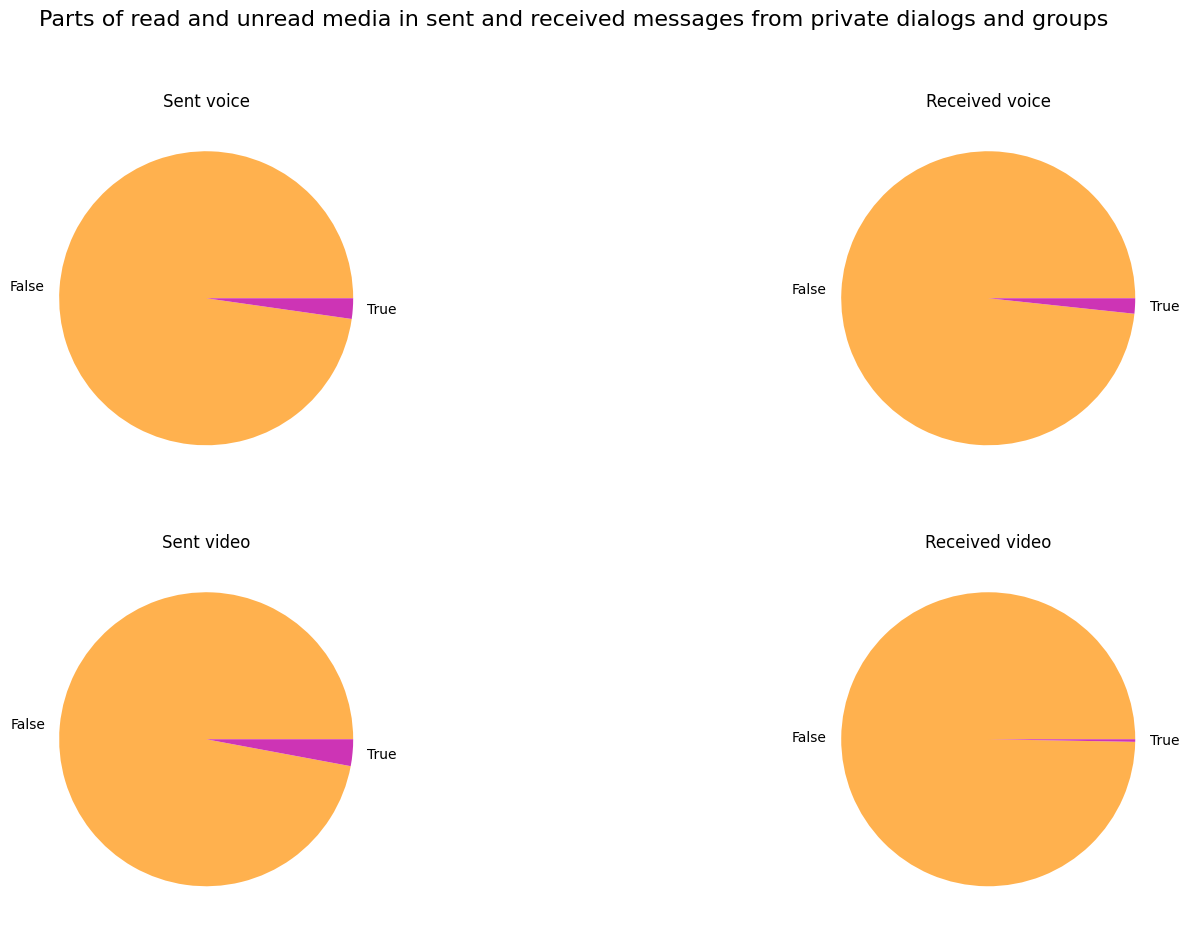

In [179]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Parts of listen and unlisten media in sent and received messages from private dialogs and groups', fontsize=16)
labels1 =[ str(x) for x in read_unread_send_media[read_unread_send_media["type"]=="voice"]["media_unread"].values]
labels2 =[ str(x) for x in read_unread_send_media[read_unread_send_media["type"]=="video"]["media_unread"].values]
labels3 =[ str(x) for x in read_unread_received_media[read_unread_received_media["type"]=="voice"]["media_unread"].values]
labels4 =[ str(x) for x in read_unread_received_media[read_unread_received_media["type"]=="video"]["media_unread"].values]

# plot each pie chart in a separate subplot
axes[0,0].pie(x = read_unread_send_media[read_unread_send_media["type"]=="voice"]["id"], labels= labels1, colors=["#ffb14e","#cd34b5"])
axes[0,0].set_title('Sent voice')

axes[1,0].pie(x = read_unread_send_media[read_unread_send_media["type"]=="video"]["id"], labels= labels2, colors=["#ffb14e","#cd34b5"])
axes[1,0].set_title('Sent video')

axes[0,1].pie(x = read_unread_received_media[read_unread_received_media["type"]=="voice"]["id"], labels= labels3, colors=["#ffb14e","#cd34b5"])
axes[0,1].set_title('Received voice')

axes[1,1].pie(x = read_unread_received_media[read_unread_received_media["type"]=="video"]["id"], labels= labels4,colors=["#ffb14e","#cd34b5"])
axes[1,1].set_title('Received video')

plt.show()

**Результат**: переважна більшість медіа повідомень прослухана, при чому голосові повідомлення, які надіслані від мене прослуховують частіше, аніж відео повідомлення. Щодо отриманих повідомлень - навпаки, частіше прослуховуються (мною та учасниками груп) відео повідомлення. Висновком є те, що для того щоб інформацію прослухали з трошки більшою ймовірністю, краще користуватись голосовими повідомленням. При чому навпаки, щоб з більшою ймовірністю я переглянула інформацію, краще надсилати відео.

##### b. From channels and supergroup

**Мета**: знайти частку прослуханих та непрослуханих відео повідомлень та голосвих повідомлень відправлених та отриманих в каналах і супергрупах.

In [32]:
def is_channel_name(id):
    if id:
        s = str(id)
        return s.startswith("PeerChannel")
    return False

channel_sent = send_messages.copy()
channel_sent['is_channel'] = channel_sent['to_id'].apply(is_channel_name)
channel_sent = channel_sent[channel_sent['is_channel']==True]

channel_receive = received_messages.copy()
channel_receive['is_channel'] = channel_receive['to_id'].apply(is_channel_name)
channel_receive = channel_receive[channel_receive['is_channel']==True]

ch_read_unread_send_media = channel_sent[(channel_sent["type"]=='voice')|(channel_sent["type"]=='video')][["media_unread", "id", "type"]].groupby(["type","media_unread"], as_index=False).count()
ch_read_unread_received_media = channel_receive[(channel_receive["type"]=='voice')|(channel_receive["type"]=='video')][["media_unread", "id", "type"]].groupby(["type","media_unread"], as_index=False).count()

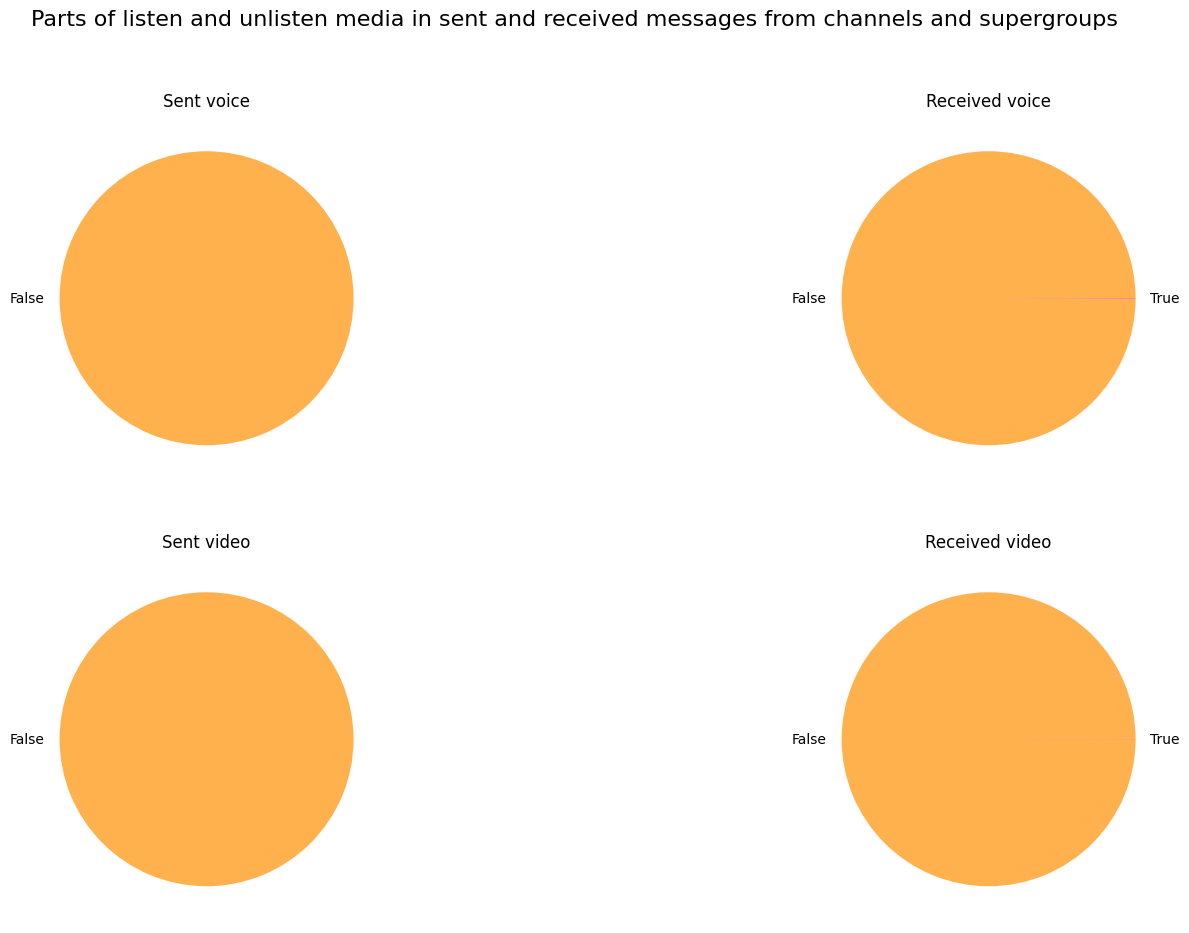

In [224]:
# create a figure with two subplots
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Parts of listen and unlisten media in sent and received messages from channels and supergroups', fontsize=16)
labels1 =[ str(x) for x in ch_read_unread_send_media[ch_read_unread_send_media["type"]=="voice"]["media_unread"].values]
labels2 =[ str(x) for x in ch_read_unread_send_media[ch_read_unread_send_media["type"]=="video"]["media_unread"].values]
labels3 =[ str(x) for x in ch_read_unread_received_media[ch_read_unread_received_media["type"]=="voice"]["media_unread"].values]
labels4 =[ str(x) for x in ch_read_unread_received_media[ch_read_unread_received_media["type"]=="video"]["media_unread"].values]

# plot each pie chart in a separate subplot
axes[0,0].pie(x = ch_read_unread_send_media[ch_read_unread_send_media["type"]=="voice"]["id"], labels= labels1, colors=["#ffb14e","#cd34b5"])
axes[0,0].set_title('Sent voice')

axes[1,0].pie(x = ch_read_unread_send_media[ch_read_unread_send_media["type"]=="video"]["id"], labels= labels2, colors=["#ffb14e","#cd34b5"])
axes[1,0].set_title('Sent video')

axes[0,1].pie(x = ch_read_unread_received_media[ch_read_unread_received_media["type"]=="voice"]["id"], labels= labels3, colors=["#ffb14e","#cd34b5"])
axes[0,1].set_title('Received voice')

axes[1,1].pie(x = ch_read_unread_received_media[ch_read_unread_received_media["type"]=="video"]["id"], labels= labels4,colors=["#ffb14e","#cd34b5"])
axes[1,1].set_title('Received video')

plt.show()

**Результат**: всі медіа повідомення, які надсилались, були прослухані. Пов'язую це з тим, що я рідко надсилаю повідомлення в супергрупи. Щодо отриманих повідомлень  - майже всі вони переглянуті. Є невелика частина голосових, і ще менша відео, які на момент викачування даних не були переглянуті. Але частка непроглянутих голосових трошки більша. Проте вважаю, що це не є показником, бо, як правило, в супергрупах і каналах багато учасників, а тому повідомлення переглядаються швидко, бо знайдеться хоч одна людина, якій буде цікаво прослухати. Висновок: якщо потрібно донести інформацію, краще скидати її в супергрупи де багато учасників, або на канал

Абсолютне значенння переглянутих/непереглянутих повідомлень:

In [24]:
ch_read_unread_received_media

type  media_unread     id
0  video         False  77658
1  video          True     13
2  voice         False   4133
3  voice          True      2

Список діалогів з цими повідомленнями:

In [25]:
not_listen_data = channel_receive[((channel_receive["type"]=='voice')|(channel_receive["type"]=='video')) & (channel_receive["media_unread"]==True)][["dialog_id","date","edit_date", "type", "duration","reaction"]]
not_listen_data

dialog_id                       date                  edit_date  \
703878  -1001142723513  2022-11-04 23:23:40+00:00  2022-11-04 23:24:05+00:00   
1355407 -1001277991080  2022-11-04 04:41:24+00:00  2022-11-04 05:33:09+00:00   
1653448 -1001531968033  2022-11-03 18:34:51+00:00  2022-11-03 18:35:33+00:00   
1653459 -1001531968033  2022-11-03 17:25:10+00:00                        NaN   
1653492 -1001531968033  2022-11-01 20:35:04+00:00                        NaN   
1653494 -1001531968033  2022-11-01 20:31:27+00:00                        NaN   
1653498 -1001531968033  2022-11-01 20:30:22+00:00                        NaN   
1653500 -1001531968033  2022-11-01 20:28:56+00:00                        NaN   
1653503 -1001531968033  2022-11-01 20:27:44+00:00                        NaN   
1653593 -1001531968033  2022-11-01 09:48:16+00:00                        NaN   
1653612 -1001531968033  2022-11-01 06:47:17+00:00                        NaN   
1728193 -1001685026999  2022-11-05 08:56:39+00:00  2022-11-05 08:56:42+00:00   
1728194 -1001685026999  2022-11-05 08:41:40+00:00  2022-11-05 08:41:43+00:00   
1728217 -1001685026999  2022-11-01 07:07:30+00:00  2022-11-01 08:08:00+00:00   
1728218 -1001685026999  2022-11-01 07:07:29+00:00  2022-11-01 12:51:49+00:00   

          type  duration                                           reaction  
703878   voice      26.0                    [{'reaction': '🤯', 'count': 1}]  
1355407  video      12.0                    [{'reaction': '❤', 'count': 1}]  
1653448  video       7.0                    [{'reaction': '🔥', 'count': 2}]  
1653459  video      59.0                                                 []  
1653492  video      25.0                                                 []  
1653494  video      22.0                                                 []  
1653498  video      23.0                                                 []  
1653500  video      15.0                                                 []  
1653503  video      18.0                                                 []  
1653593  video       9.0                                                 []  
1653612  voice      14.0                                                 []  
1728193  video       6.0                                                 []  
1728194  video       6.0                                                 []  
1728217  video      29.0  [{'reaction': '🔥', 'count': 4}, {'reaction': '...  
1728218  video      31.0  [{'reaction': '👍', 'count': 1}, {'reaction': '...

In [26]:
df_meta[df_meta['dialog_id'].isin(not_listen_data['dialog_id'].values)][['dialog_id','name']].drop_duplicates()

dialog_id                    name
2723 -1001142723513                      ФІ
5555 -1001277991080  Mohyla EUROVISION fans
7982 -1001531968033                Чаклунки

Примітка. Цікаво, що деякі повідомлення позначені, як непереглянуті, але мають реакції. Частина з них належить супергрупі, а частина новинному каналу, який не зберігся в df_meta, але це Цензор.нет

####  Message analyze

##### a. Edited messages overview 

**Мета**: знайти частку редагованих повідомленнь в приватних діалогах та групах і супергрупах та каналах.

In [17]:
import numpy as np

In [11]:
def is_edited(date):
    if type(date)==type('str'):
        return True
    return False

In [81]:
pg_send['edited'] = pg_send['edit_date'].apply(is_edited)
pg_received['edited'] = pg_received['edit_date'].apply(is_edited)

channel_sent['edited'] = channel_sent['edit_date'].apply(is_edited)
channel_receive['edited'] = channel_receive['edit_date'].apply(is_edited)

In [25]:
pgr = pg_received[["edited", "id"]].groupby(["edited"], as_index=False).count()
pgs = pg_send[["edited", "id"]].groupby(["edited"], as_index=False).count()
cgr = channel_sent[["edited", "id"]].groupby(["edited"], as_index=False).count()
cgs = channel_receive[["edited", "id"]].groupby(["edited"], as_index=False).count()

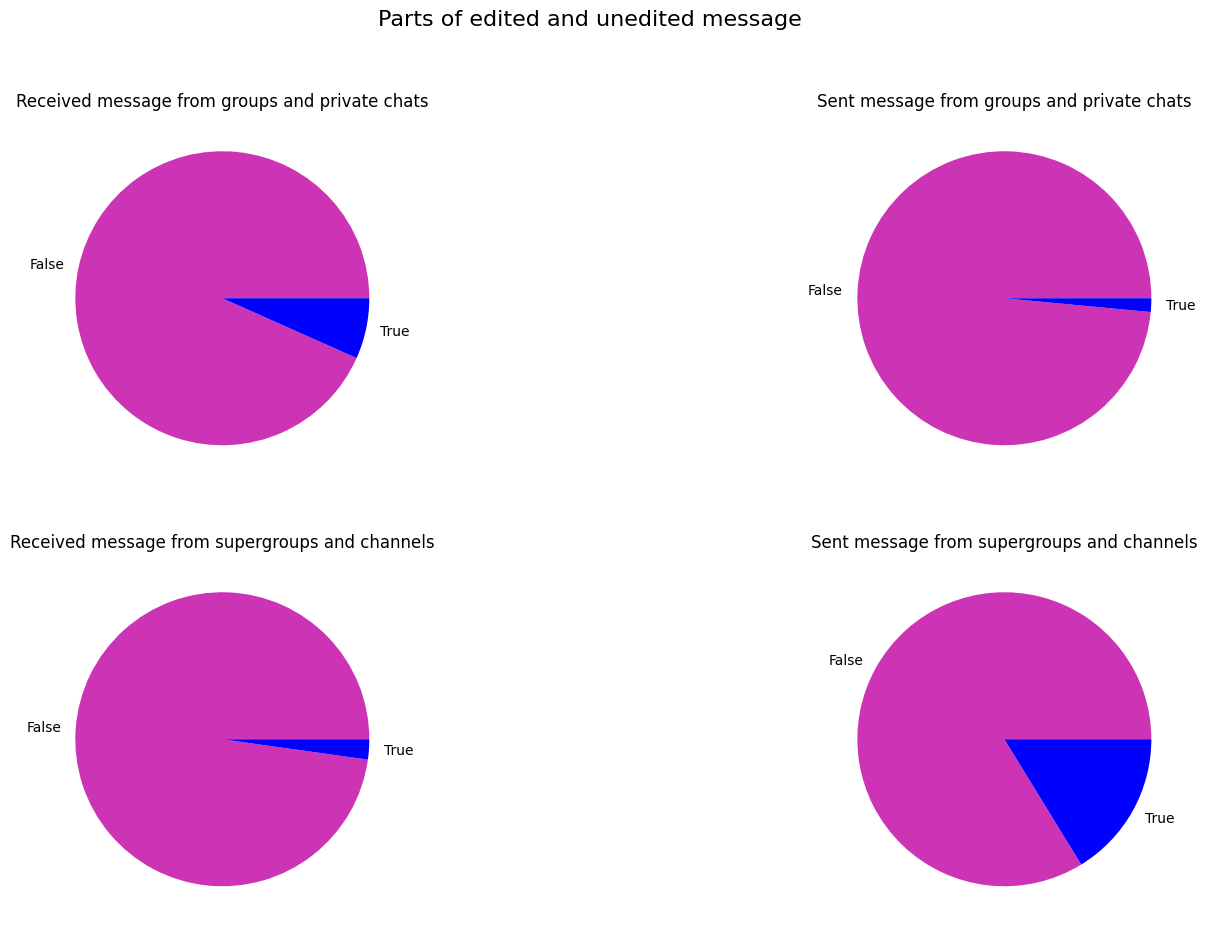

In [248]:
# create a figure with two subplots
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Parts of edited and unedited message', fontsize=16)

# plot each pie chart in a separate subplot
axes[0,0].pie(x = pgr["id"], labels= pgr["edited"], colors=["#cd34b5","#0000ff"])
axes[0,0].set_title('Received message from groups and private chats')

axes[1,0].pie(x = cgr["id"], labels= cgr["edited"], colors=["#cd34b5","#0000ff"])
axes[1,0].set_title('Received message from supergroups and channels')

axes[0,1].pie(x = pgs["id"], labels= pgr["edited"], colors=["#cd34b5","#0000ff"])
axes[0,1].set_title('Sent message from groups and private chats')

axes[1,1].pie(x = cgs["id"], labels= cgr["edited"], colors=["#cd34b5","#0000ff"])
axes[1,1].set_title('Sent message from supergroups and channels')

plt.show()

**Результат**: серед відправлених повідомлень, частіше редагуються повідомлення надіслані до супергруп та каналів і, навпаки, серед отриманих повідомлень частіше редагуються повідомлення з приватних діалогів та супергруп. 

##### b. Find in what day of the week edited messages are more often 

**Мета:** знайти абсолютний розподіл редагованих повідомлень в залежності від дня тижня

In [16]:
pgs_edit = pg_send[pg_send["edited"]==True][["w_day", "id", "nw_day"]].groupby(["w_day", "nw_day"],as_index=False).count().sort_values("nw_day")
pgr_edit = pg_received[pg_received["edited"]==True][["w_day", "id", "nw_day"]].groupby(["w_day", "nw_day"],as_index=False).count().sort_values("nw_day")
cgs_edit = channel_sent[channel_sent["edited"]==True][["w_day", "id", "nw_day"]].groupby(["w_day", "nw_day"],as_index=False).count().sort_values("nw_day")
cgr_edit = channel_receive[channel_receive["edited"]==True][["w_day", "id", "nw_day"]].groupby(["w_day", "nw_day"],as_index=False).count().sort_values("nw_day")

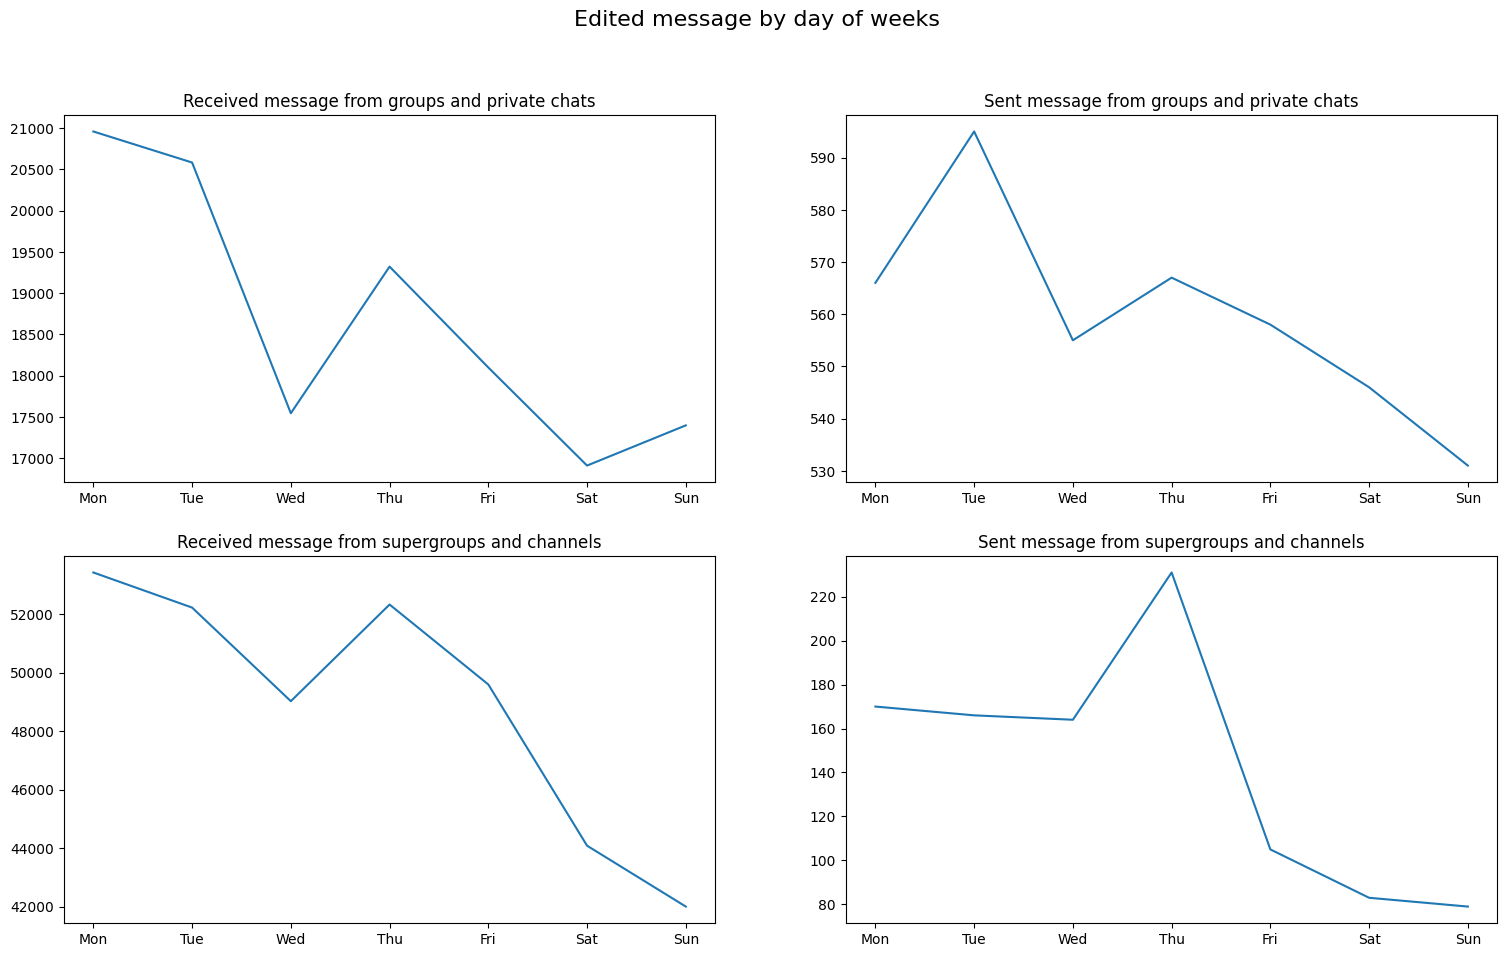

In [270]:
# create a figure with two subplots
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Edited message by day of weeks', fontsize=16)

# plot each pie chart in a separate subplot
axes[0,0].plot(pgr_edit["w_day"], pgr_edit["id"])
axes[0,0].set_title('Received message from groups and private chats')

axes[1,0].plot(cgr_edit["w_day"], cgr_edit["id"])
axes[1,0].set_title('Received message from supergroups and channels')

axes[0,1].plot(pgs_edit["w_day"], pgs_edit["id"])
axes[0,1].set_title('Sent message from groups and private chats')

axes[1,1].plot(cgs_edit["w_day"], cgs_edit["id"])
axes[1,1].set_title('Sent message from supergroups and channels')

plt.show()

**Результат**: Найбільше виправлень в одержаних повідомленнях відбувається у понеділок. Далі значення падає, після чого в четвер воно зростає і після продовжує падати. Для відправлених повідомлень найбільше значення було в вівторок (для приватних чатів та груп) та у четвер для супергруп і каналів. Тенденція зменшення кількості редагованих повідомлень впродовж тижня зберігається. Найменше редагувань відбувалось у вихідні.

##### c. Mean value of edited messages

**Мета:** знайти розподіл середнього числа редагованих повідомлень в залежності від дня тижня

In [17]:
mpgs_edit = pg_send[pg_send["edited"]==True][["ddate", "w_day", "id", "nw_day"]].groupby(["ddate", "w_day", "nw_day"],as_index=False).count().groupby(["w_day", "nw_day"],as_index=False).mean(numeric_only = True).sort_values("nw_day")
mpgr_edit = pg_received[pg_received["edited"]==True][["ddate", "w_day", "id", "nw_day"]].groupby(["ddate", "w_day", "nw_day"],as_index=False).count().groupby(["w_day", "nw_day"],as_index=False).mean(numeric_only = True).sort_values("nw_day")
mcgs_edit = channel_sent[channel_sent["edited"]==True][["ddate", "w_day", "id", "nw_day"]].groupby(["ddate", "w_day", "nw_day"],as_index=False).count().groupby(["w_day", "nw_day"],as_index=False).mean(numeric_only = True).sort_values("nw_day")
mcgr_edit = channel_receive[channel_receive["edited"]==True][["ddate", "w_day", "id", "nw_day"]].groupby(["ddate", "w_day", "nw_day"],as_index=False).count().groupby(["w_day", "nw_day"],as_index=False).mean(numeric_only = True).sort_values("nw_day")

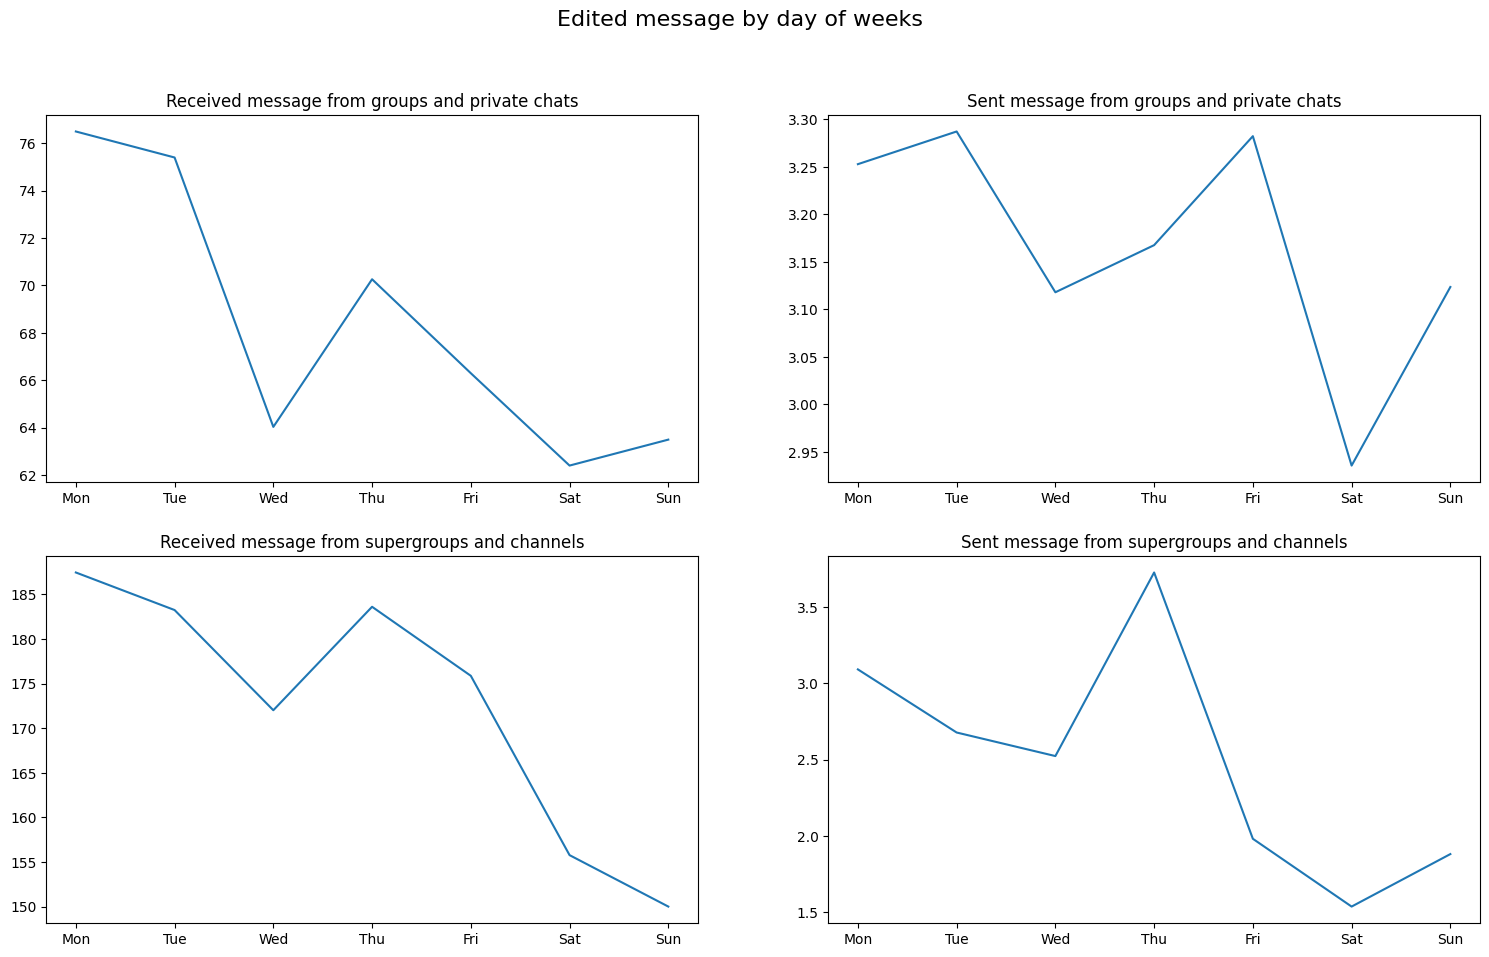

In [67]:
# create a figure with two subplots
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Edited message by day of weeks', fontsize=16)

# plot each pie chart in a separate subplot
axes[0,0].plot(mpgr_edit["w_day"], mpgr_edit["id"])
axes[0,0].set_title('Received message from groups and private chats')

axes[1,0].plot(mcgr_edit["w_day"], mcgr_edit["id"])
axes[1,0].set_title('Received message from supergroups and channels')

axes[0,1].plot(mpgs_edit["w_day"], mpgs_edit["id"])
axes[0,1].set_title('Sent message from groups and private chats')

axes[1,1].plot(mcgs_edit["w_day"], mcgs_edit["id"])
axes[1,1].set_title('Sent message from supergroups and channels')

plt.show()

**Результат**: Найбільше виправлень в одержаних повідомленнях відбувається у понеділок. Далі значення падає, після чого в четвер воно зростає і після продовжує падати. Для відправлених повідомлень найбільше значення було в вівторок (для приватних чатів та груп) та у четвер для супергруп і каналів. Найменше редагувань відбувалось у вихідні. Загалом середнє не сильно відрізняється в порівнянні з абсолютним числом

##### d. Mean of all messages

**Мета:** знайти середнє число всіх повідомлень в залежності від дня тижня

In [18]:
apgs = pg_send[["ddate", "w_day", "id", "nw_day"]].groupby(["ddate", "w_day", "nw_day"],as_index=False).count().groupby(["w_day", "nw_day"],as_index=False).mean(numeric_only = True).sort_values("nw_day")
apgr = pg_received[["ddate", "w_day", "id", "nw_day"]].groupby(["ddate", "w_day", "nw_day"],as_index=False).count().groupby(["w_day", "nw_day"],as_index=False).mean(numeric_only = True).sort_values("nw_day")
acgs = channel_sent[["ddate", "w_day", "id", "nw_day"]].groupby(["ddate", "w_day", "nw_day"],as_index=False).count().groupby(["w_day", "nw_day"],as_index=False).mean(numeric_only = True).sort_values("nw_day")
acgr = channel_receive[["ddate", "w_day", "id", "nw_day"]].groupby(["ddate", "w_day", "nw_day"],as_index=False).count().groupby(["w_day", "nw_day"],as_index=False).mean(numeric_only = True).sort_values("nw_day")

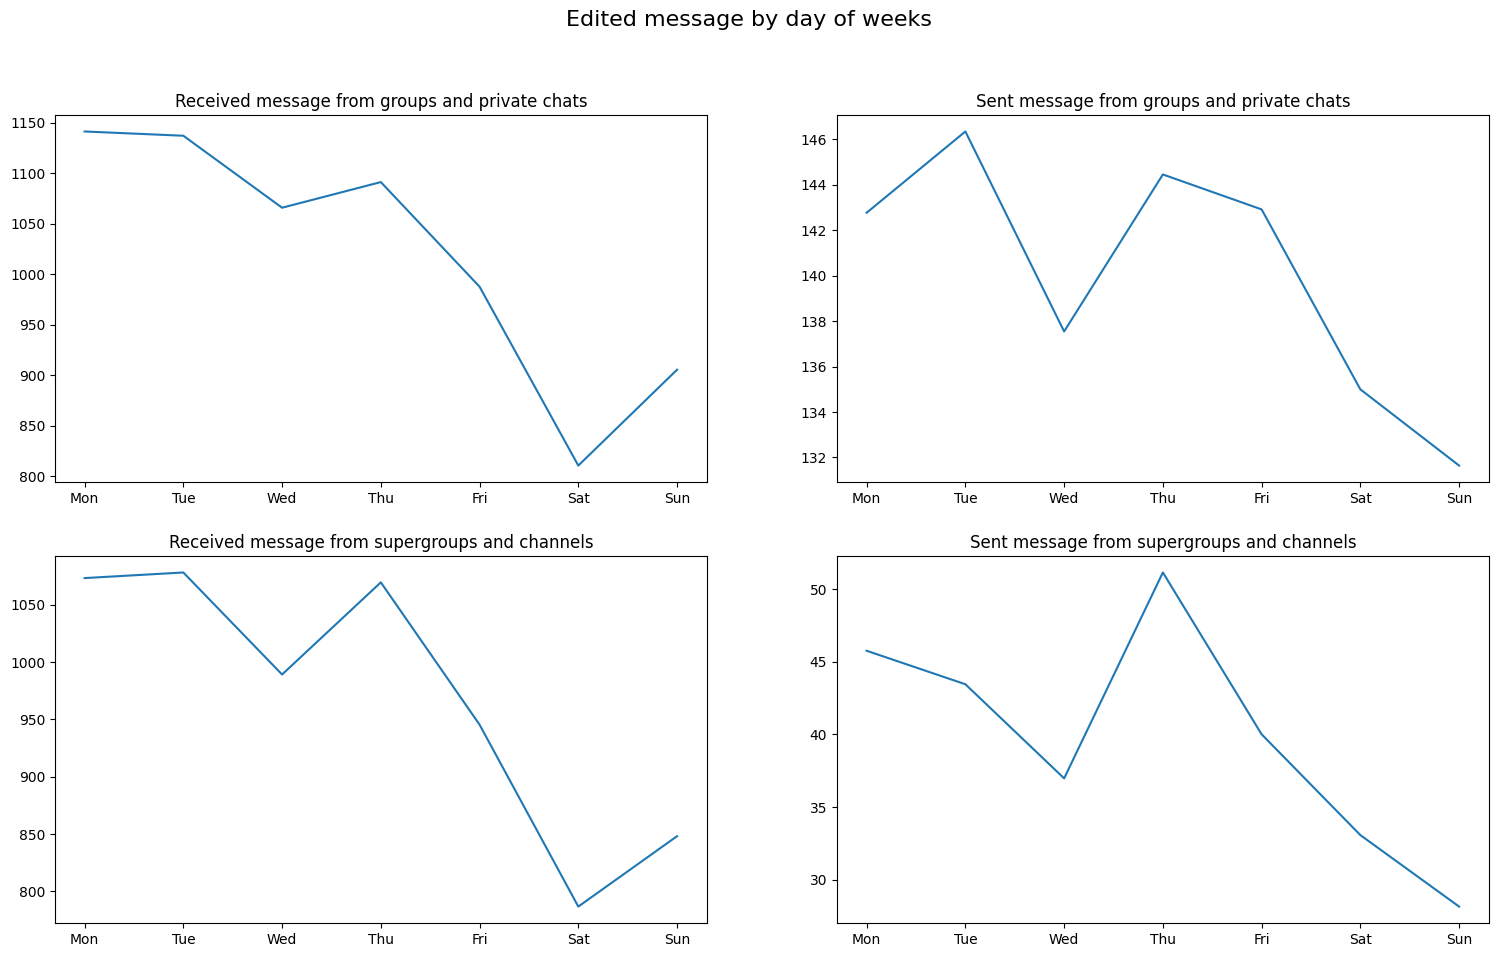

In [314]:
# create a figure with two subplots
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Edited message by day of weeks', fontsize=16)

# plot each pie chart in a separate subplot
axes[0,0].plot(apgr["w_day"], apgr["id"])
axes[0,0].set_title('Received message from groups and private chats')

axes[1,0].plot(acgr["w_day"], acgr["id"])
axes[1,0].set_title('Received message from supergroups and channels')

axes[0,1].plot(apgs["w_day"], apgs["id"])
axes[0,1].set_title('Sent message from groups and private chats')

axes[1,1].plot(acgs["w_day"], acgs["id"])
axes[1,1].set_title('Sent message from supergroups and channels')

plt.show()

**Результат**: Найбільше повідомлень в одержаних у приватних чатах і групах у понеділок. Далі значення падає, після чого в суботу воно досягає найнижчої точки. Для отриманих повідомлень з супер груп та каналів картина схожа, але максимального значення досягається у вівторок, після чого спостерігається стрибок в четвер і падіння значення до суботи. Для відправлених повідомлень найбільше значення було в вівторок (для приватних чатів та груп) та у четвер для супергруп і каналів. Найменше повідомлень загалом у вихідні. Висновок: найактивніше телеграмом користуються у понеділок, вівторок та четвер.

##### e. Edit / all

**Мета:** знайти відносний розподіл середнього значення редагованих повідомлень повідомлень в залежності від дня тижня

In [19]:
mapgs = mpgs_edit.merge(apgs, left_on='nw_day', right_on='nw_day')
mapgr = mpgr_edit.merge(apgr, left_on='nw_day', right_on='nw_day')
macgs = mcgs_edit.merge(acgs, left_on='nw_day', right_on='nw_day')
macgr = mcgr_edit.merge(acgr, left_on='nw_day', right_on='nw_day')

mapgs["rel"] = mapgs['id_x']/mapgs['id_y']
mapgr["rel"] = mapgr['id_x']/mapgr['id_y']
macgs["rel"] = macgs['id_x']/macgs['id_y']
macgr["rel"] = macgr['id_x']/macgr['id_y']

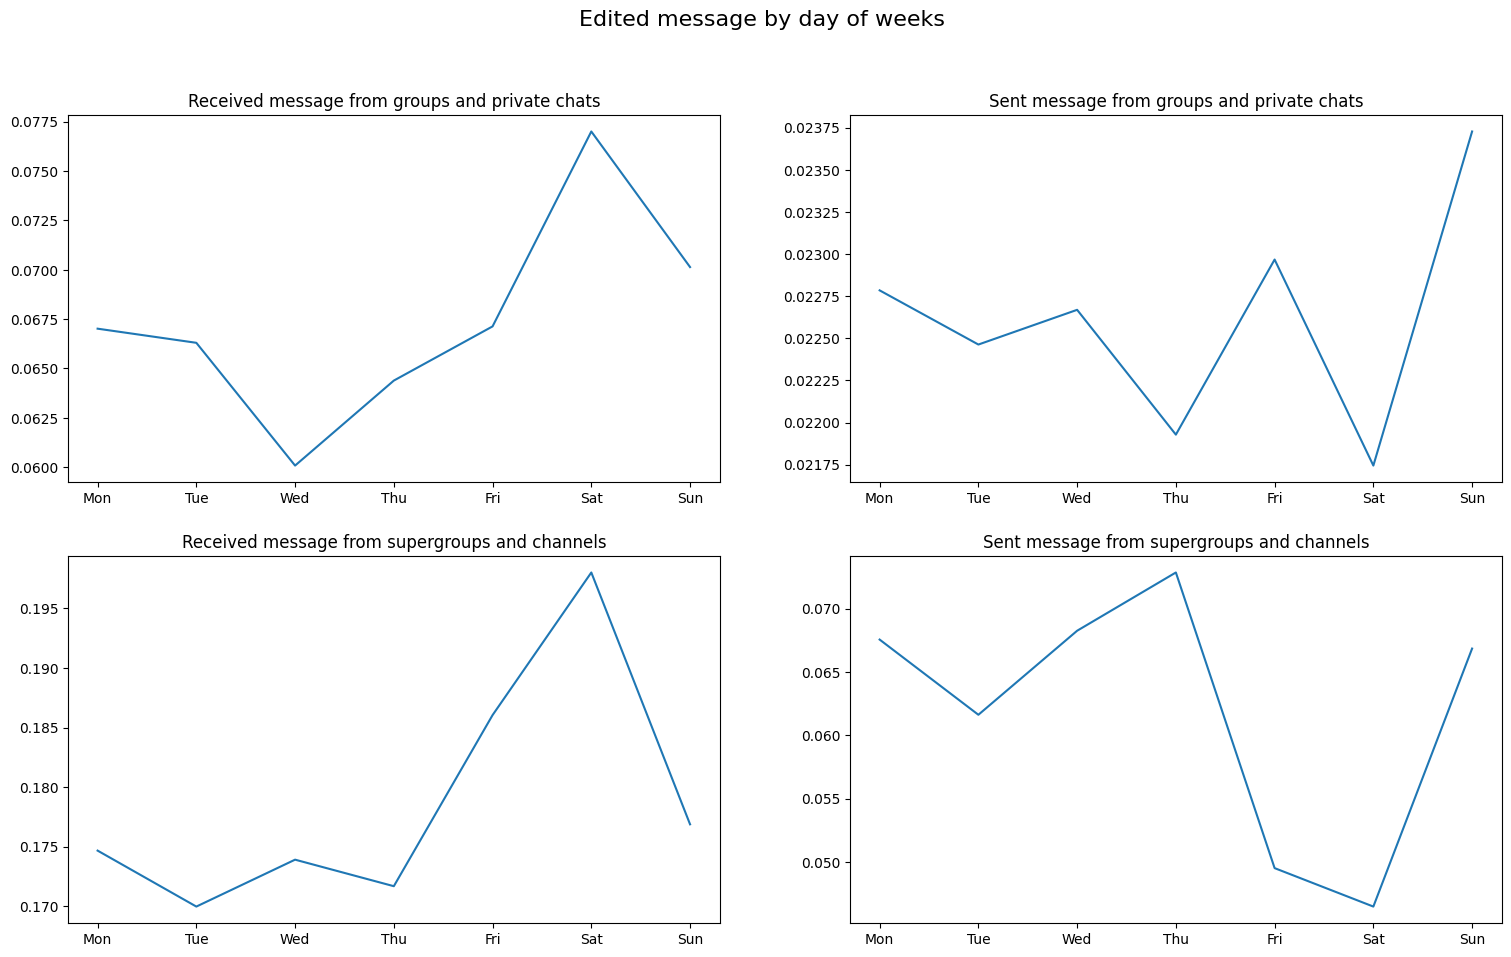

In [321]:
# create a figure with two subplots
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Edited message by day of weeks', fontsize=16)

# plot each pie chart in a separate subplot
axes[0,0].plot(mapgr["w_day_x"], mapgr["rel"])
axes[0,0].set_title('Received message from groups and private chats')

axes[1,0].plot(macgr["w_day_x"], macgr["rel"])
axes[1,0].set_title('Received message from supergroups and channels')

axes[0,1].plot(mapgs["w_day_x"], mapgs["rel"])
axes[0,1].set_title('Sent message from groups and private chats')

axes[1,1].plot(macgs["w_day_x"], macgs["rel"])
axes[1,1].set_title('Sent message from supergroups and channels')

plt.show()

**Результати**: відповідно до графіків найчастіше люди роблять помилки на вихідні, а саме в суботу. Що стосується надісланих повідомлень, то найбільшого значення редагованих повідомлень досягається в неділю (в приватних чатах) та в четвер (в супер групах)

##### f. Message distribution (absolute) by day per year

**Завдання**: знайти абсолютний розподіл відправлених повідомлень в залежності від дня тижня для кожного року.

**Мета**: демонстрація зміни поведінки впродовж часу

In [36]:
aapgs_year = pg_send[["year", "w_day", "id", "nw_day"]].groupby(["year", "w_day", "nw_day"],as_index=False).count().sort_values("nw_day")
aapgr_year = pg_received[["year", "w_day", "id", "nw_day"]].groupby(["year", "w_day", "nw_day"],as_index=False).count().sort_values("nw_day")
aacgs_year = channel_sent[["year", "w_day", "id", "nw_day"]].groupby(["year", "w_day", "nw_day"],as_index=False).count().sort_values("nw_day")
aacgr_year = channel_receive[["year", "w_day", "id", "nw_day"]].groupby(["year", "w_day", "nw_day"],as_index=False).count().sort_values("nw_day")

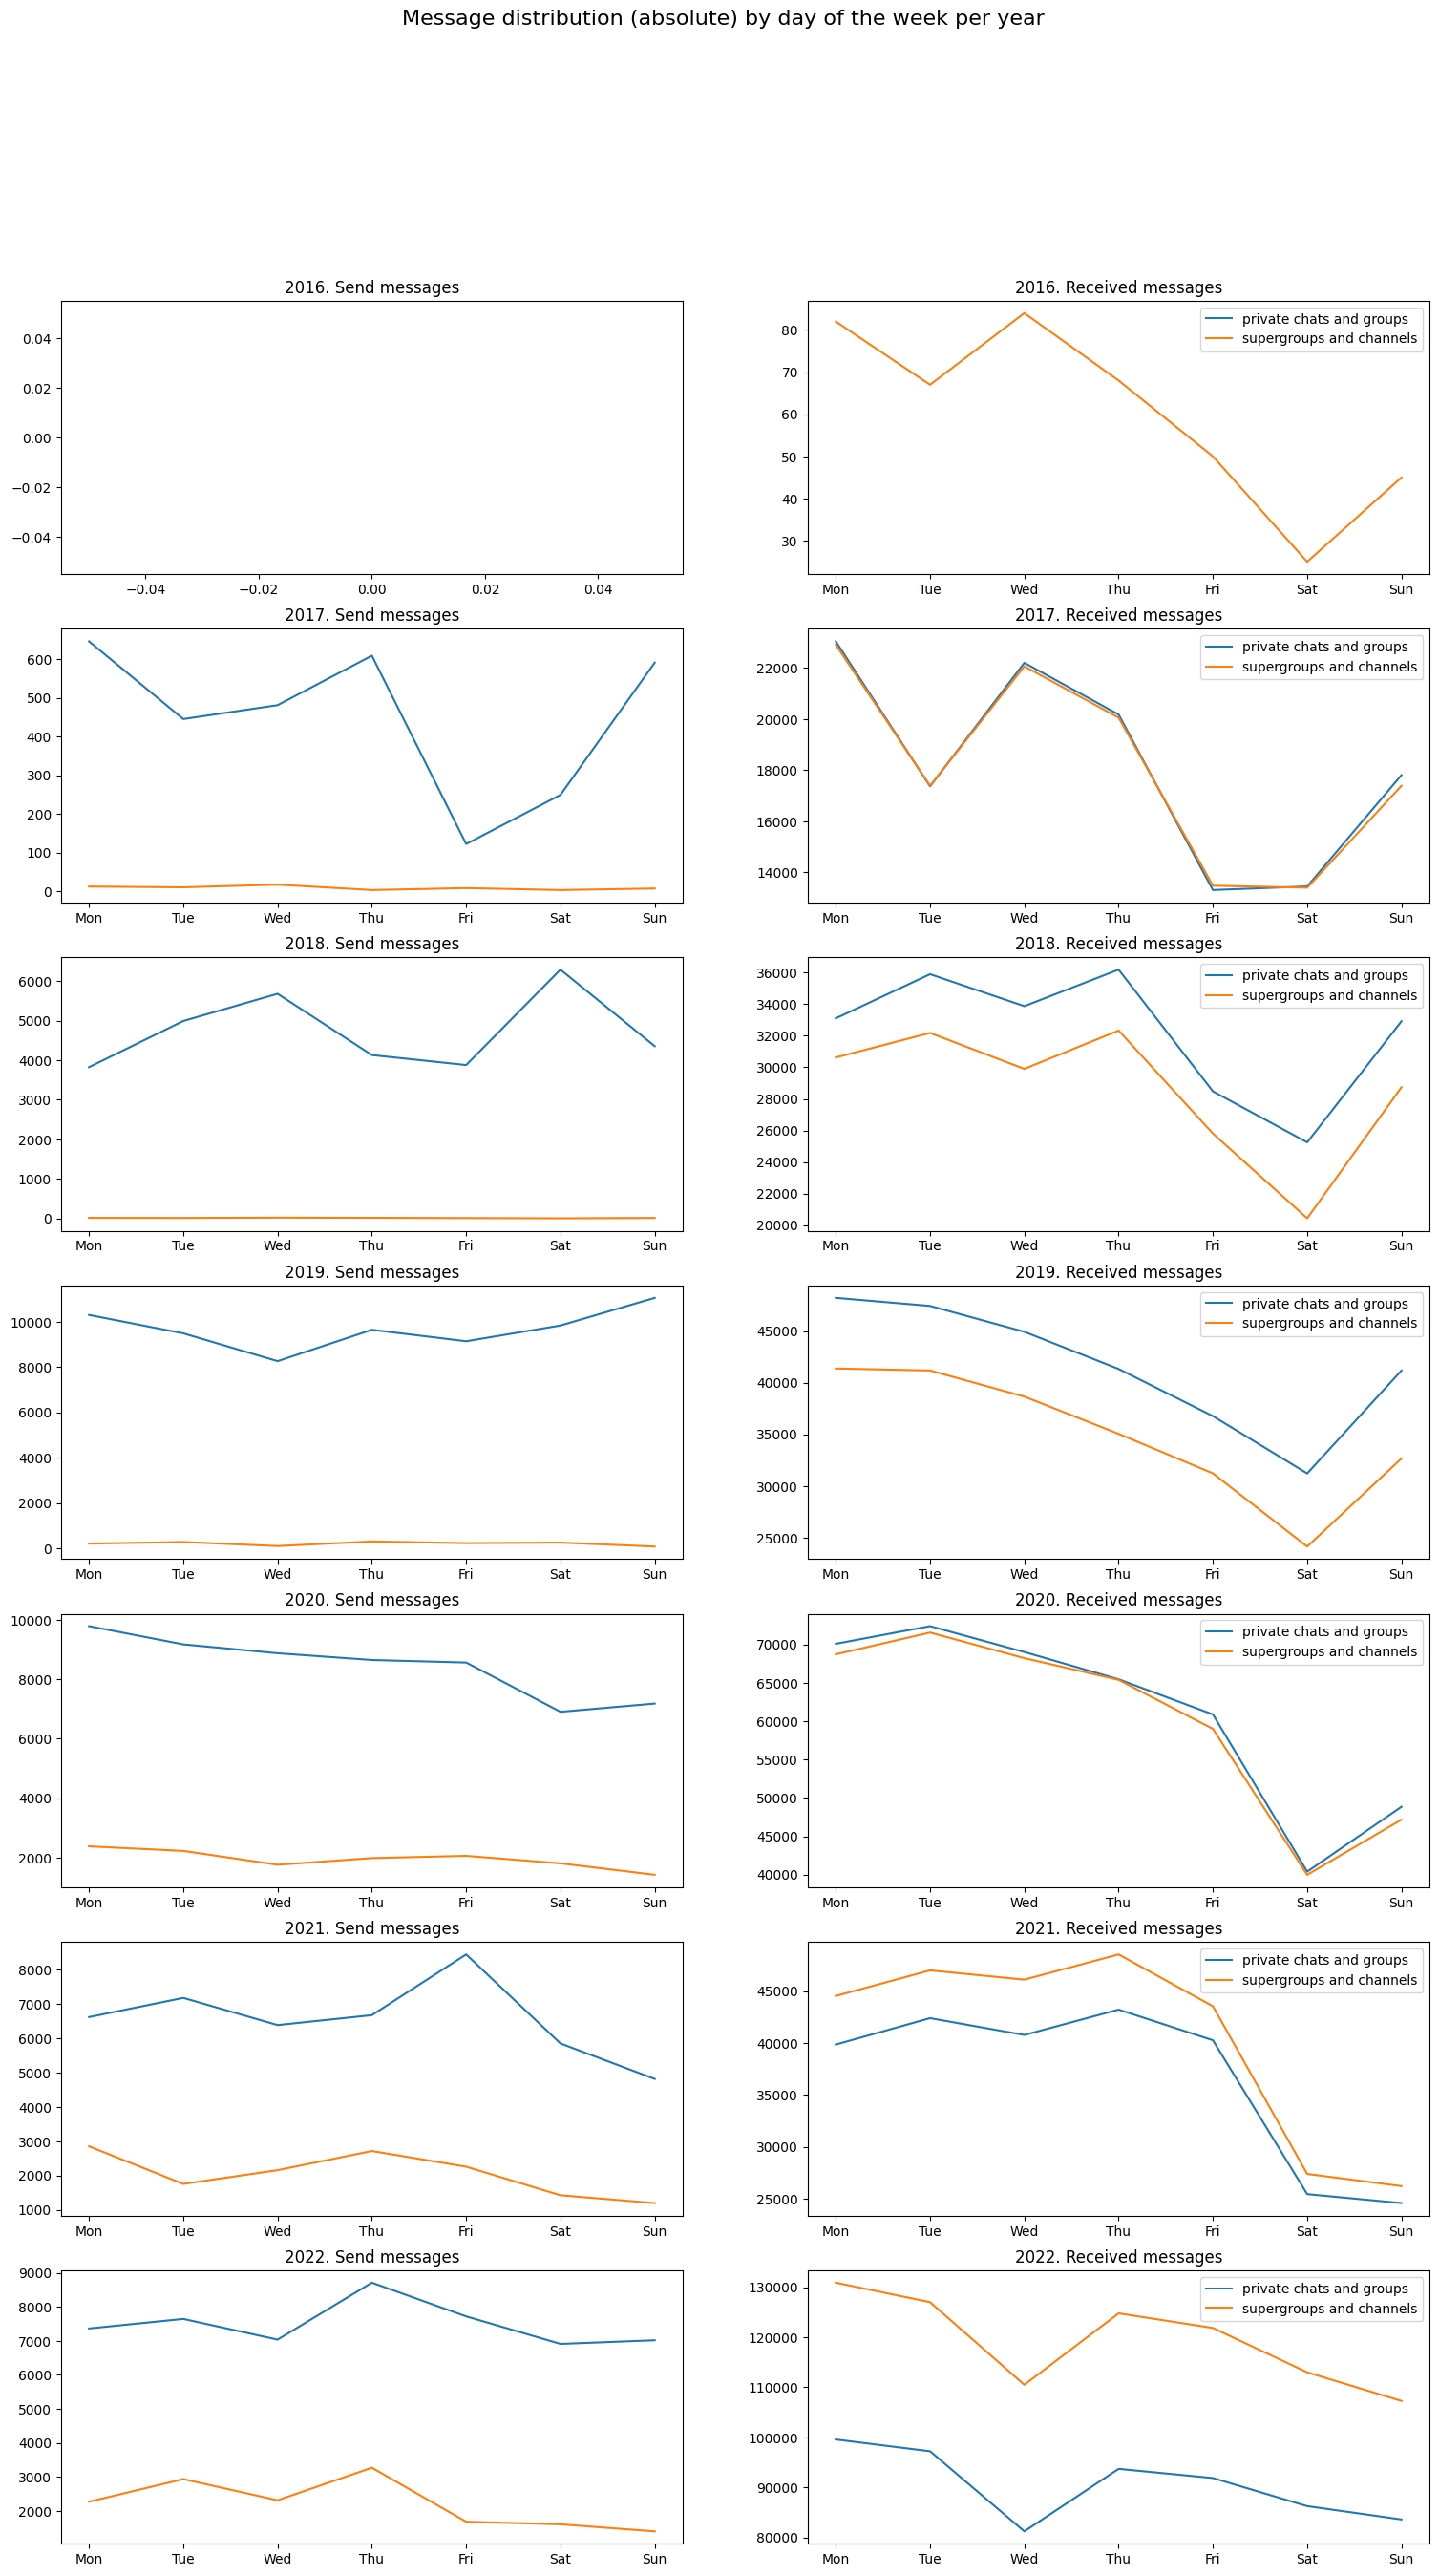

In [351]:
fig, axes = plt.subplots(7, 2)
fig.set_size_inches(18.5, 30.5)
fig.suptitle('Message distribution (absolute) by day of the week per year', fontsize=16)

# 2016
axes[0,0].plot(aapgs_year[aapgs_year['year']=='2016']["w_day"], aapgs_year[aapgs_year['year']=='2016']["id"], label = "private chats and groups", linestyle="-")
axes[0,0].plot(aacgs_year[aacgs_year['year']=='2016']["w_day"], aacgs_year[aacgs_year['year']=='2016']["id"], label = "supergroups and channels", linestyle="-")
axes[0,0].set_title('2016. Send messages')

axes[0,1].plot(aapgr_year[aapgr_year['year']=='2016']["w_day"], aapgr_year[aapgr_year['year']=='2016']["id"], label = "private chats and groups", linestyle="-")
axes[0,1].plot(aacgr_year[aacgr_year['year']=='2016']["w_day"], aacgr_year[aacgr_year['year']=='2016']["id"], label = "supergroups and channels", linestyle="-")
axes[0,1].set_title('2016. Received messages')
# 2017
axes[1,0].plot(aapgs_year[aapgs_year['year']=='2017']["w_day"], aapgs_year[aapgs_year['year']=='2017']["id"], label = "private chats and groups", linestyle="-")
axes[1,0].plot(aacgs_year[aacgs_year['year']=='2017']["w_day"], aacgs_year[aacgs_year['year']=='2017']["id"], label = "supergroups and channels", linestyle="-")
axes[1,0].set_title('2017. Send messages')

axes[1,1].plot(aapgr_year[aapgr_year['year']=='2017']["w_day"], aapgr_year[aapgr_year['year']=='2017']["id"], label = "private chats and groups", linestyle="-")
axes[1,1].plot(aacgr_year[aacgr_year['year']=='2017']["w_day"], aacgr_year[aacgr_year['year']=='2017']["id"], label = "supergroups and channels", linestyle="-")
axes[1,1].set_title('2017. Received messages')
# 2018
axes[2,0].plot(aapgs_year[aapgs_year['year']=='2018']["w_day"], aapgs_year[aapgs_year['year']=='2018']["id"], label = "private chats and groups", linestyle="-")
axes[2,0].plot(aacgs_year[aacgs_year['year']=='2018']["w_day"], aacgs_year[aacgs_year['year']=='2018']["id"], label = "supergroups and channels", linestyle="-")
axes[2,0].set_title('2018. Send messages')

axes[2,1].plot(aapgr_year[aapgr_year['year']=='2018']["w_day"], aapgr_year[aapgr_year['year']=='2018']["id"], label = "private chats and groups", linestyle="-")
axes[2,1].plot(aacgr_year[aacgr_year['year']=='2018']["w_day"], aacgr_year[aacgr_year['year']=='2018']["id"], label = "supergroups and channels", linestyle="-")
axes[2,1].set_title('2018. Received messages')
# 2019
axes[3,0].plot(aapgs_year[aapgs_year['year']=='2019']["w_day"], aapgs_year[aapgs_year['year']=='2019']["id"], label = "private chats and groups", linestyle="-")
axes[3,0].plot(aacgs_year[aacgs_year['year']=='2019']["w_day"], aacgs_year[aacgs_year['year']=='2019']["id"], label = "supergroups and channels", linestyle="-")
axes[3,0].set_title('2019. Send messages')

axes[3,1].plot(aapgr_year[aapgr_year['year']=='2019']["w_day"], aapgr_year[aapgr_year['year']=='2019']["id"], label = "private chats and groups", linestyle="-")
axes[3,1].plot(aacgr_year[aacgr_year['year']=='2019']["w_day"], aacgr_year[aacgr_year['year']=='2019']["id"], label = "supergroups and channels", linestyle="-")
axes[3,1].set_title('2019. Received messages')
# 2020
axes[4,0].plot(aapgs_year[aapgs_year['year']=='2020']["w_day"], aapgs_year[aapgs_year['year']=='2020']["id"], label = "private chats and groups", linestyle="-")
axes[4,0].plot(aacgs_year[aacgs_year['year']=='2020']["w_day"], aacgs_year[aacgs_year['year']=='2020']["id"], label = "supergroups and channels", linestyle="-")
axes[4,0].set_title('2020. Send messages')

axes[4,1].plot(aapgr_year[aapgr_year['year']=='2020']["w_day"], aapgr_year[aapgr_year['year']=='2020']["id"], label = "private chats and groups", linestyle="-")
axes[4,1].plot(aacgr_year[aacgr_year['year']=='2020']["w_day"], aacgr_year[aacgr_year['year']=='2020']["id"], label = "supergroups and channels", linestyle="-")
axes[4,1].set_title('2020. Received messages')
# 2021
axes[5,0].plot(aapgs_year[aapgs_year['year']=='2021']["w_day"], aapgs_year[aapgs_year['year']=='2021']["id"], label = "private chats and groups", linestyle="-")
axes[5,0].plot(aacgs_year[aacgs_year['year']=='2021']["w_day"], aacgs_year[aacgs_year['year']=='2021']["id"], label = "supergroups and channels", linestyle="-")
axes[5,0].set_title('2021. Send messages')

axes[5,1].plot(aapgr_year[aapgr_year['year']=='2021']["w_day"], aapgr_year[aapgr_year['year']=='2021']["id"], label = "private chats and groups", linestyle="-")
axes[5,1].plot(aacgr_year[aacgr_year['year']=='2021']["w_day"], aacgr_year[aacgr_year['year']=='2021']["id"], label = "supergroups and channels", linestyle="-")
axes[5,1].set_title('2021. Received messages')
# 2022
axes[6,0].plot(aapgs_year[aapgs_year['year']=='2022']["w_day"], aapgs_year[aapgs_year['year']=='2022']["id"], label = "private chats and groups", linestyle="-")
axes[6,0].plot(aacgs_year[aacgs_year['year']=='2022']["w_day"], aacgs_year[aacgs_year['year']=='2022']["id"], label = "supergroups and channels", linestyle="-")
axes[6,0].set_title('2022. Send messages')

axes[6,1].plot(aapgr_year[aapgr_year['year']=='2022']["w_day"], aapgr_year[aapgr_year['year']=='2022']["id"], label = "private chats and groups", linestyle="-")
axes[6,1].plot(aacgr_year[aacgr_year['year']=='2022']["w_day"], aacgr_year[aacgr_year['year']=='2022']["id"], label = "supergroups and channels", linestyle="-")
axes[6,1].set_title('2022. Received messages')

for i in range(0,7):
    axes[i,1].legend(loc="upper right")
    
plt.show()

**Результати**: за допомогою графіків можна прослідкувати, як змінювався обсяг користування телеграмом. В 2016 році представлені дані лише з отриманих повідомлень з каналів і супер груп в зв'язку з тим, що в 2016 році телеграмом я ще не користувалась. Цікавим є і те, що отримані повідомлення в 2017 році майже повністю збігаються. Також можна побачити, як з 2019 року збільшується кількість використання супер груп. 

##### g. Message distribution (mean) by day per year

**Завдання**: знайти розподіл середнього відправлених повідомлень в залежності від дня тижня для кожного року.

**Мета**: демонстрація зміни поведінки впродовж часу

In [73]:
aapgs_year = pg_send[["year", "ddate", "w_day", "id", "nw_day"]].groupby(["year", "ddate", "w_day", "nw_day"],as_index=False).count().sort_values("nw_day").groupby(["w_day", "year", "nw_day"],as_index=False).mean(numeric_only = True).sort_values("nw_day")
aapgr_year = pg_received[["year", "ddate", "w_day", "id", "nw_day"]].groupby(["year",  "ddate","w_day", "nw_day"],as_index=False).count().sort_values("nw_day").groupby(["w_day","year", "nw_day"],as_index=False).mean(numeric_only = True).sort_values("nw_day")
aacgs_year = channel_sent[["year", "ddate", "w_day", "id", "nw_day"]].groupby(["year", "ddate", "w_day", "nw_day"],as_index=False).count().sort_values("nw_day").groupby(["w_day","year", "nw_day"],as_index=False).mean(numeric_only = True).sort_values("nw_day")
aacgr_year = channel_receive[["year", "ddate", "w_day", "id", "nw_day"]].groupby(["year", "ddate", "w_day", "nw_day"],as_index=False).count().sort_values("nw_day").groupby(["w_day","year", "nw_day"],as_index=False).mean(numeric_only = True).sort_values("nw_day")

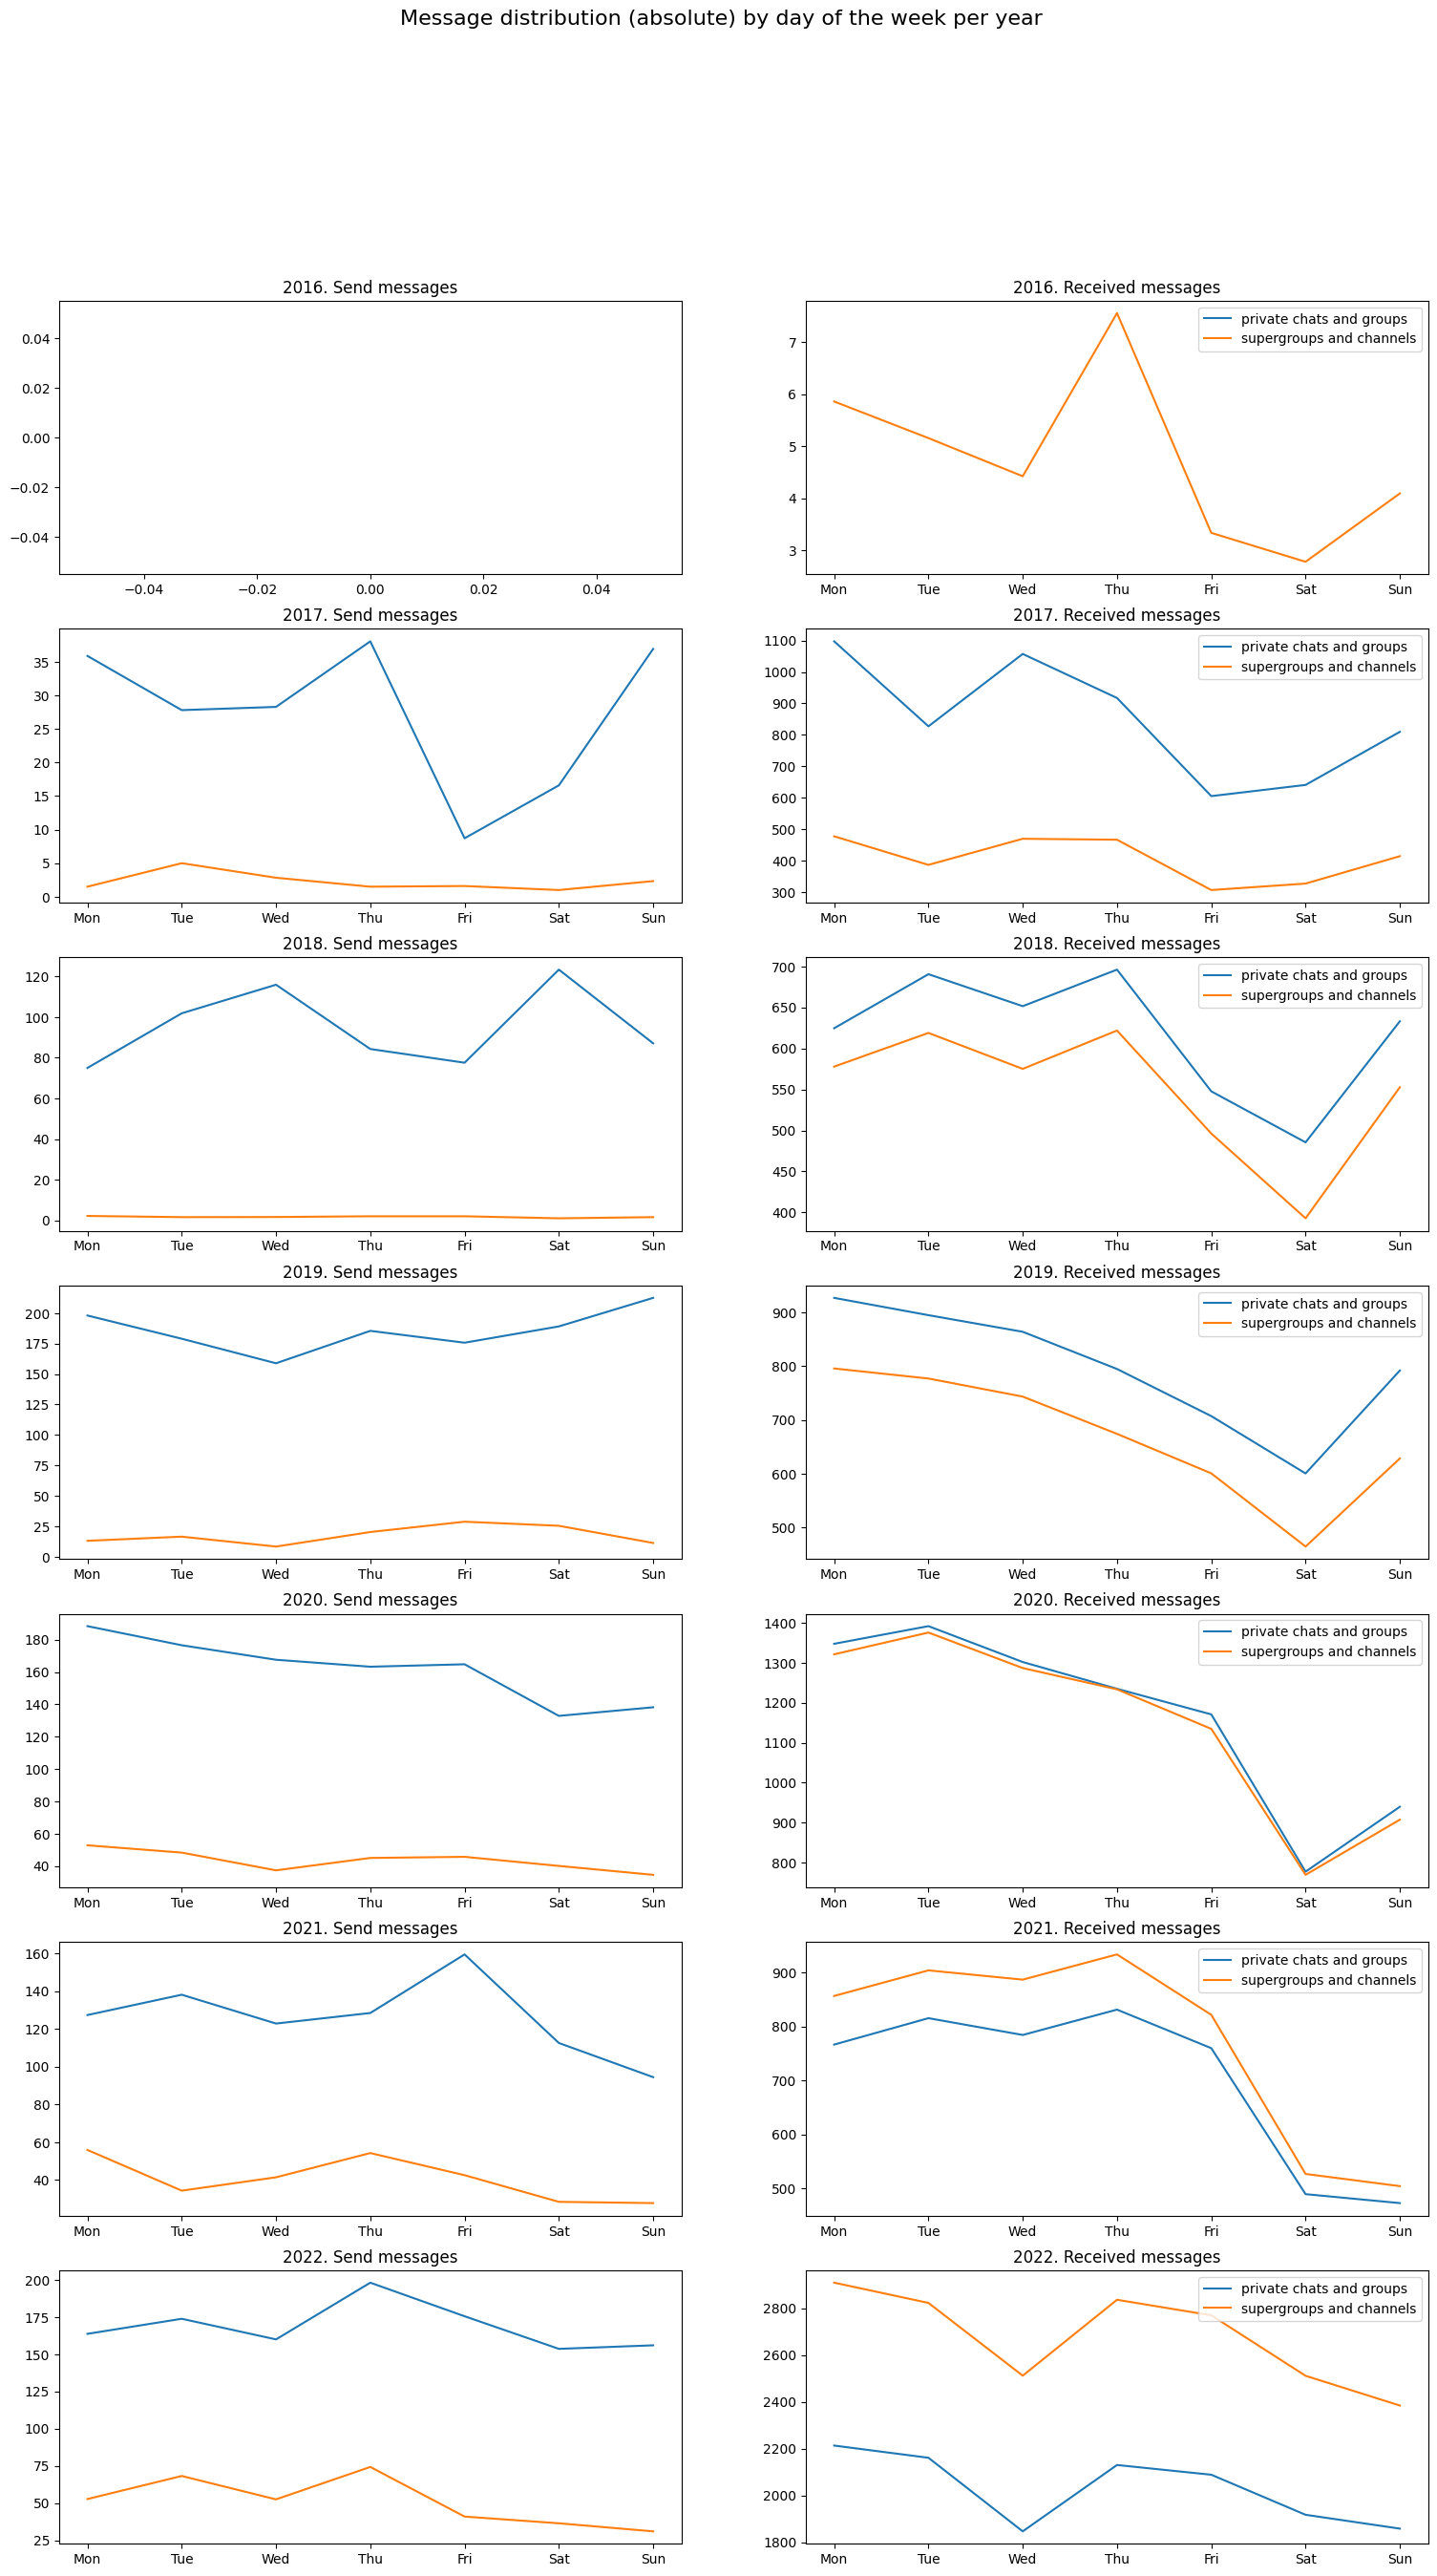

In [75]:
fig, axes = plt.subplots(7, 2)
fig.set_size_inches(18.5, 30.5)
fig.suptitle('Message distribution (absolute) by day of the week per year', fontsize=16)

# 2016
axes[0,0].plot(aapgs_year[aapgs_year['year']=='2016']["w_day"], aapgs_year[aapgs_year['year']=='2016']["id"], label = "private chats and groups", linestyle="-")
axes[0,0].plot(aacgs_year[aacgs_year['year']=='2016']["w_day"], aacgs_year[aacgs_year['year']=='2016']["id"], label = "supergroups and channels", linestyle="-")
axes[0,0].set_title('2016. Send messages')

axes[0,1].plot(aapgr_year[aapgr_year['year']=='2016']["w_day"], aapgr_year[aapgr_year['year']=='2016']["id"], label = "private chats and groups", linestyle="-")
axes[0,1].plot(aacgr_year[aacgr_year['year']=='2016']["w_day"], aacgr_year[aacgr_year['year']=='2016']["id"], label = "supergroups and channels", linestyle="-")
axes[0,1].set_title('2016. Received messages')
# 2017
axes[1,0].plot(aapgs_year[aapgs_year['year']=='2017']["w_day"], aapgs_year[aapgs_year['year']=='2017']["id"], label = "private chats and groups", linestyle="-")
axes[1,0].plot(aacgs_year[aacgs_year['year']=='2017']["w_day"], aacgs_year[aacgs_year['year']=='2017']["id"], label = "supergroups and channels", linestyle="-")
axes[1,0].set_title('2017. Send messages')

axes[1,1].plot(aapgr_year[aapgr_year['year']=='2017']["w_day"], aapgr_year[aapgr_year['year']=='2017']["id"], label = "private chats and groups", linestyle="-")
axes[1,1].plot(aacgr_year[aacgr_year['year']=='2017']["w_day"], aacgr_year[aacgr_year['year']=='2017']["id"], label = "supergroups and channels", linestyle="-")
axes[1,1].set_title('2017. Received messages')
# 2018
axes[2,0].plot(aapgs_year[aapgs_year['year']=='2018']["w_day"], aapgs_year[aapgs_year['year']=='2018']["id"], label = "private chats and groups", linestyle="-")
axes[2,0].plot(aacgs_year[aacgs_year['year']=='2018']["w_day"], aacgs_year[aacgs_year['year']=='2018']["id"], label = "supergroups and channels", linestyle="-")
axes[2,0].set_title('2018. Send messages')

axes[2,1].plot(aapgr_year[aapgr_year['year']=='2018']["w_day"], aapgr_year[aapgr_year['year']=='2018']["id"], label = "private chats and groups", linestyle="-")
axes[2,1].plot(aacgr_year[aacgr_year['year']=='2018']["w_day"], aacgr_year[aacgr_year['year']=='2018']["id"], label = "supergroups and channels", linestyle="-")
axes[2,1].set_title('2018. Received messages')
# 2019
axes[3,0].plot(aapgs_year[aapgs_year['year']=='2019']["w_day"], aapgs_year[aapgs_year['year']=='2019']["id"], label = "private chats and groups", linestyle="-")
axes[3,0].plot(aacgs_year[aacgs_year['year']=='2019']["w_day"], aacgs_year[aacgs_year['year']=='2019']["id"], label = "supergroups and channels", linestyle="-")
axes[3,0].set_title('2019. Send messages')

axes[3,1].plot(aapgr_year[aapgr_year['year']=='2019']["w_day"], aapgr_year[aapgr_year['year']=='2019']["id"], label = "private chats and groups", linestyle="-")
axes[3,1].plot(aacgr_year[aacgr_year['year']=='2019']["w_day"], aacgr_year[aacgr_year['year']=='2019']["id"], label = "supergroups and channels", linestyle="-")
axes[3,1].set_title('2019. Received messages')
# 2020
axes[4,0].plot(aapgs_year[aapgs_year['year']=='2020']["w_day"], aapgs_year[aapgs_year['year']=='2020']["id"], label = "private chats and groups", linestyle="-")
axes[4,0].plot(aacgs_year[aacgs_year['year']=='2020']["w_day"], aacgs_year[aacgs_year['year']=='2020']["id"], label = "supergroups and channels", linestyle="-")
axes[4,0].set_title('2020. Send messages')

axes[4,1].plot(aapgr_year[aapgr_year['year']=='2020']["w_day"], aapgr_year[aapgr_year['year']=='2020']["id"], label = "private chats and groups", linestyle="-")
axes[4,1].plot(aacgr_year[aacgr_year['year']=='2020']["w_day"], aacgr_year[aacgr_year['year']=='2020']["id"], label = "supergroups and channels", linestyle="-")
axes[4,1].set_title('2020. Received messages')
# 2021
axes[5,0].plot(aapgs_year[aapgs_year['year']=='2021']["w_day"], aapgs_year[aapgs_year['year']=='2021']["id"], label = "private chats and groups", linestyle="-")
axes[5,0].plot(aacgs_year[aacgs_year['year']=='2021']["w_day"], aacgs_year[aacgs_year['year']=='2021']["id"], label = "supergroups and channels", linestyle="-")
axes[5,0].set_title('2021. Send messages')

axes[5,1].plot(aapgr_year[aapgr_year['year']=='2021']["w_day"], aapgr_year[aapgr_year['year']=='2021']["id"], label = "private chats and groups", linestyle="-")
axes[5,1].plot(aacgr_year[aacgr_year['year']=='2021']["w_day"], aacgr_year[aacgr_year['year']=='2021']["id"], label = "supergroups and channels", linestyle="-")
axes[5,1].set_title('2021. Received messages')
# 2022
axes[6,0].plot(aapgs_year[aapgs_year['year']=='2022']["w_day"], aapgs_year[aapgs_year['year']=='2022']["id"], label = "private chats and groups", linestyle="-")
axes[6,0].plot(aacgs_year[aacgs_year['year']=='2022']["w_day"], aacgs_year[aacgs_year['year']=='2022']["id"], label = "supergroups and channels", linestyle="-")
axes[6,0].set_title('2022. Send messages')

axes[6,1].plot(aapgr_year[aapgr_year['year']=='2022']["w_day"], aapgr_year[aapgr_year['year']=='2022']["id"], label = "private chats and groups", linestyle="-")
axes[6,1].plot(aacgr_year[aacgr_year['year']=='2022']["w_day"], aacgr_year[aacgr_year['year']=='2022']["id"], label = "supergroups and channels", linestyle="-")
axes[6,1].set_title('2022. Received messages')

for i in range(0,7):
    axes[i,1].legend(loc="upper right")
    
plt.show()

**Результати**: графіки дуже схожі на абсолютні, але тепер краще демонструють, зміну щоденного використання телеграму.

##### h. Most popular time to send

**Мета**: знайти найпопулярніший час відправлення повідомлень

In [82]:
pg_send["hour"] = pg_send["dtime"].apply(lambda x: x.split(':')[0])
pg_received["hour"] = pg_received["dtime"].apply(lambda x: x.split(':')[0])
channel_receive["hour"] = channel_receive["dtime"].apply(lambda x: x.split(':')[0])
channel_sent["hour"] = channel_sent["dtime"].apply(lambda x: x.split(':')[0])

In [19]:
hpgs = pg_send[["ddate", "hour", "id"]].groupby(["ddate", "hour"],as_index=False).count().groupby(["hour"],as_index=False).mean(numeric_only = True).sort_values("hour")
hpgr = pg_received[["ddate", "hour", "id"]].groupby(["ddate", "hour"],as_index=False).count().groupby(["hour"],as_index=False).mean(numeric_only = True).sort_values("hour")
hcgs = channel_sent[["ddate", "hour", "id"]].groupby(["ddate", "hour"],as_index=False).count().groupby(["hour"],as_index=False).mean(numeric_only = True).sort_values("hour")
hcgr = channel_receive[["ddate", "hour", "id"]].groupby(["ddate", "hour"],as_index=False).count().groupby(["hour"],as_index=False).mean(numeric_only = True).sort_values("hour")

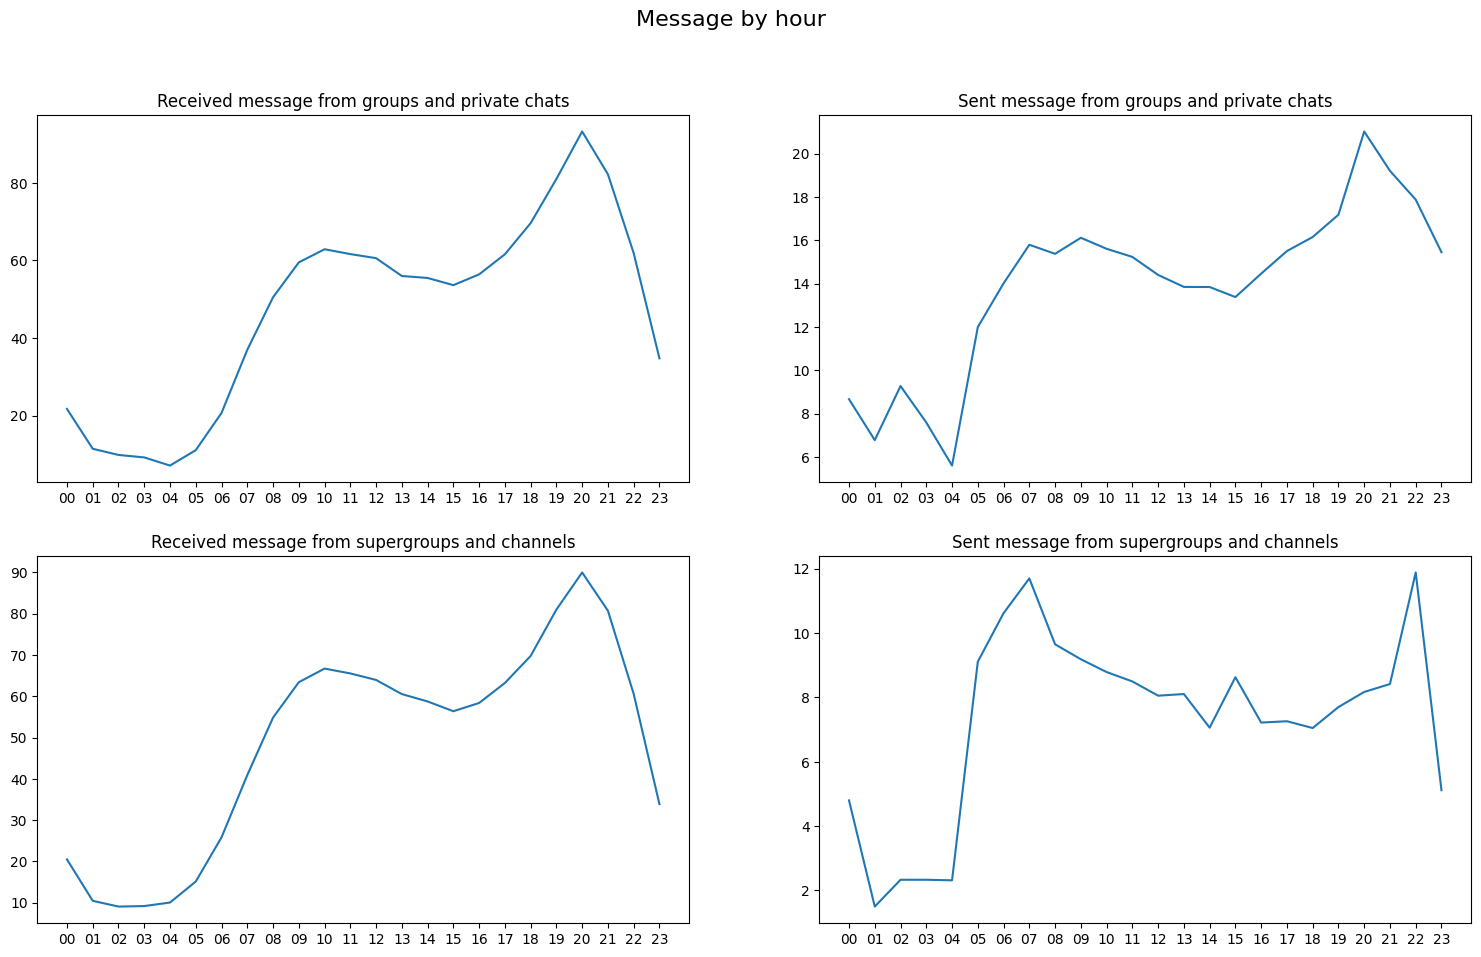

In [367]:
# create a figure with two subplots
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Message by hour', fontsize=16)

# plot each pie chart in a separate subplot
axes[0,0].plot(hpgr["hour"], hpgr["id"])
axes[0,0].set_title('Received message from groups and private chats')

axes[1,0].plot(hcgr["hour"], hcgr["id"])
axes[1,0].set_title('Received message from supergroups and channels')

axes[0,1].plot(hpgs["hour"], hpgs["id"])
axes[0,1].set_title('Sent message from groups and private chats')

axes[1,1].plot(hcgs["hour"], hcgs["id"])
axes[1,1].set_title('Sent message from supergroups and channels')

plt.show()

**Результат**: для всіх типів повідомлень (одержані/відправлені) та діалогів значення виростає до 9-10 години вечора. Найменше повідомлень вночі з 1 до 4 години. Але в надісланих повідомленнях також спостерігається стрибок кількості повідомлень з 5 до 8 ранку.

##### е. Most popular time to send

**Мета**: знайти найпопулярніший час відправлення повідомлень відносно року

In [40]:
hpgs = pg_send[["ddate","year", "hour", "id"]].groupby(["ddate","year",  "hour"],as_index=False).count().groupby(["year", "hour"],as_index=False).mean(numeric_only = True).sort_values("hour")
hpgr = pg_received[["ddate","year",  "hour", "id"]].groupby(["ddate","year",  "hour"],as_index=False).count().groupby(["year","hour"],as_index=False).mean(numeric_only = True).sort_values("hour")
hcgs = channel_sent[["ddate","year",  "hour", "id"]].groupby(["ddate","year",  "hour"],as_index=False).count().groupby(["year","hour"],as_index=False).mean(numeric_only = True).sort_values("hour")
hcgr = channel_receive[["ddate","year",  "hour", "id"]].groupby(["ddate","year",  "hour"],as_index=False).count().groupby(["year","hour"],as_index=False).mean(numeric_only = True).sort_values("hour")

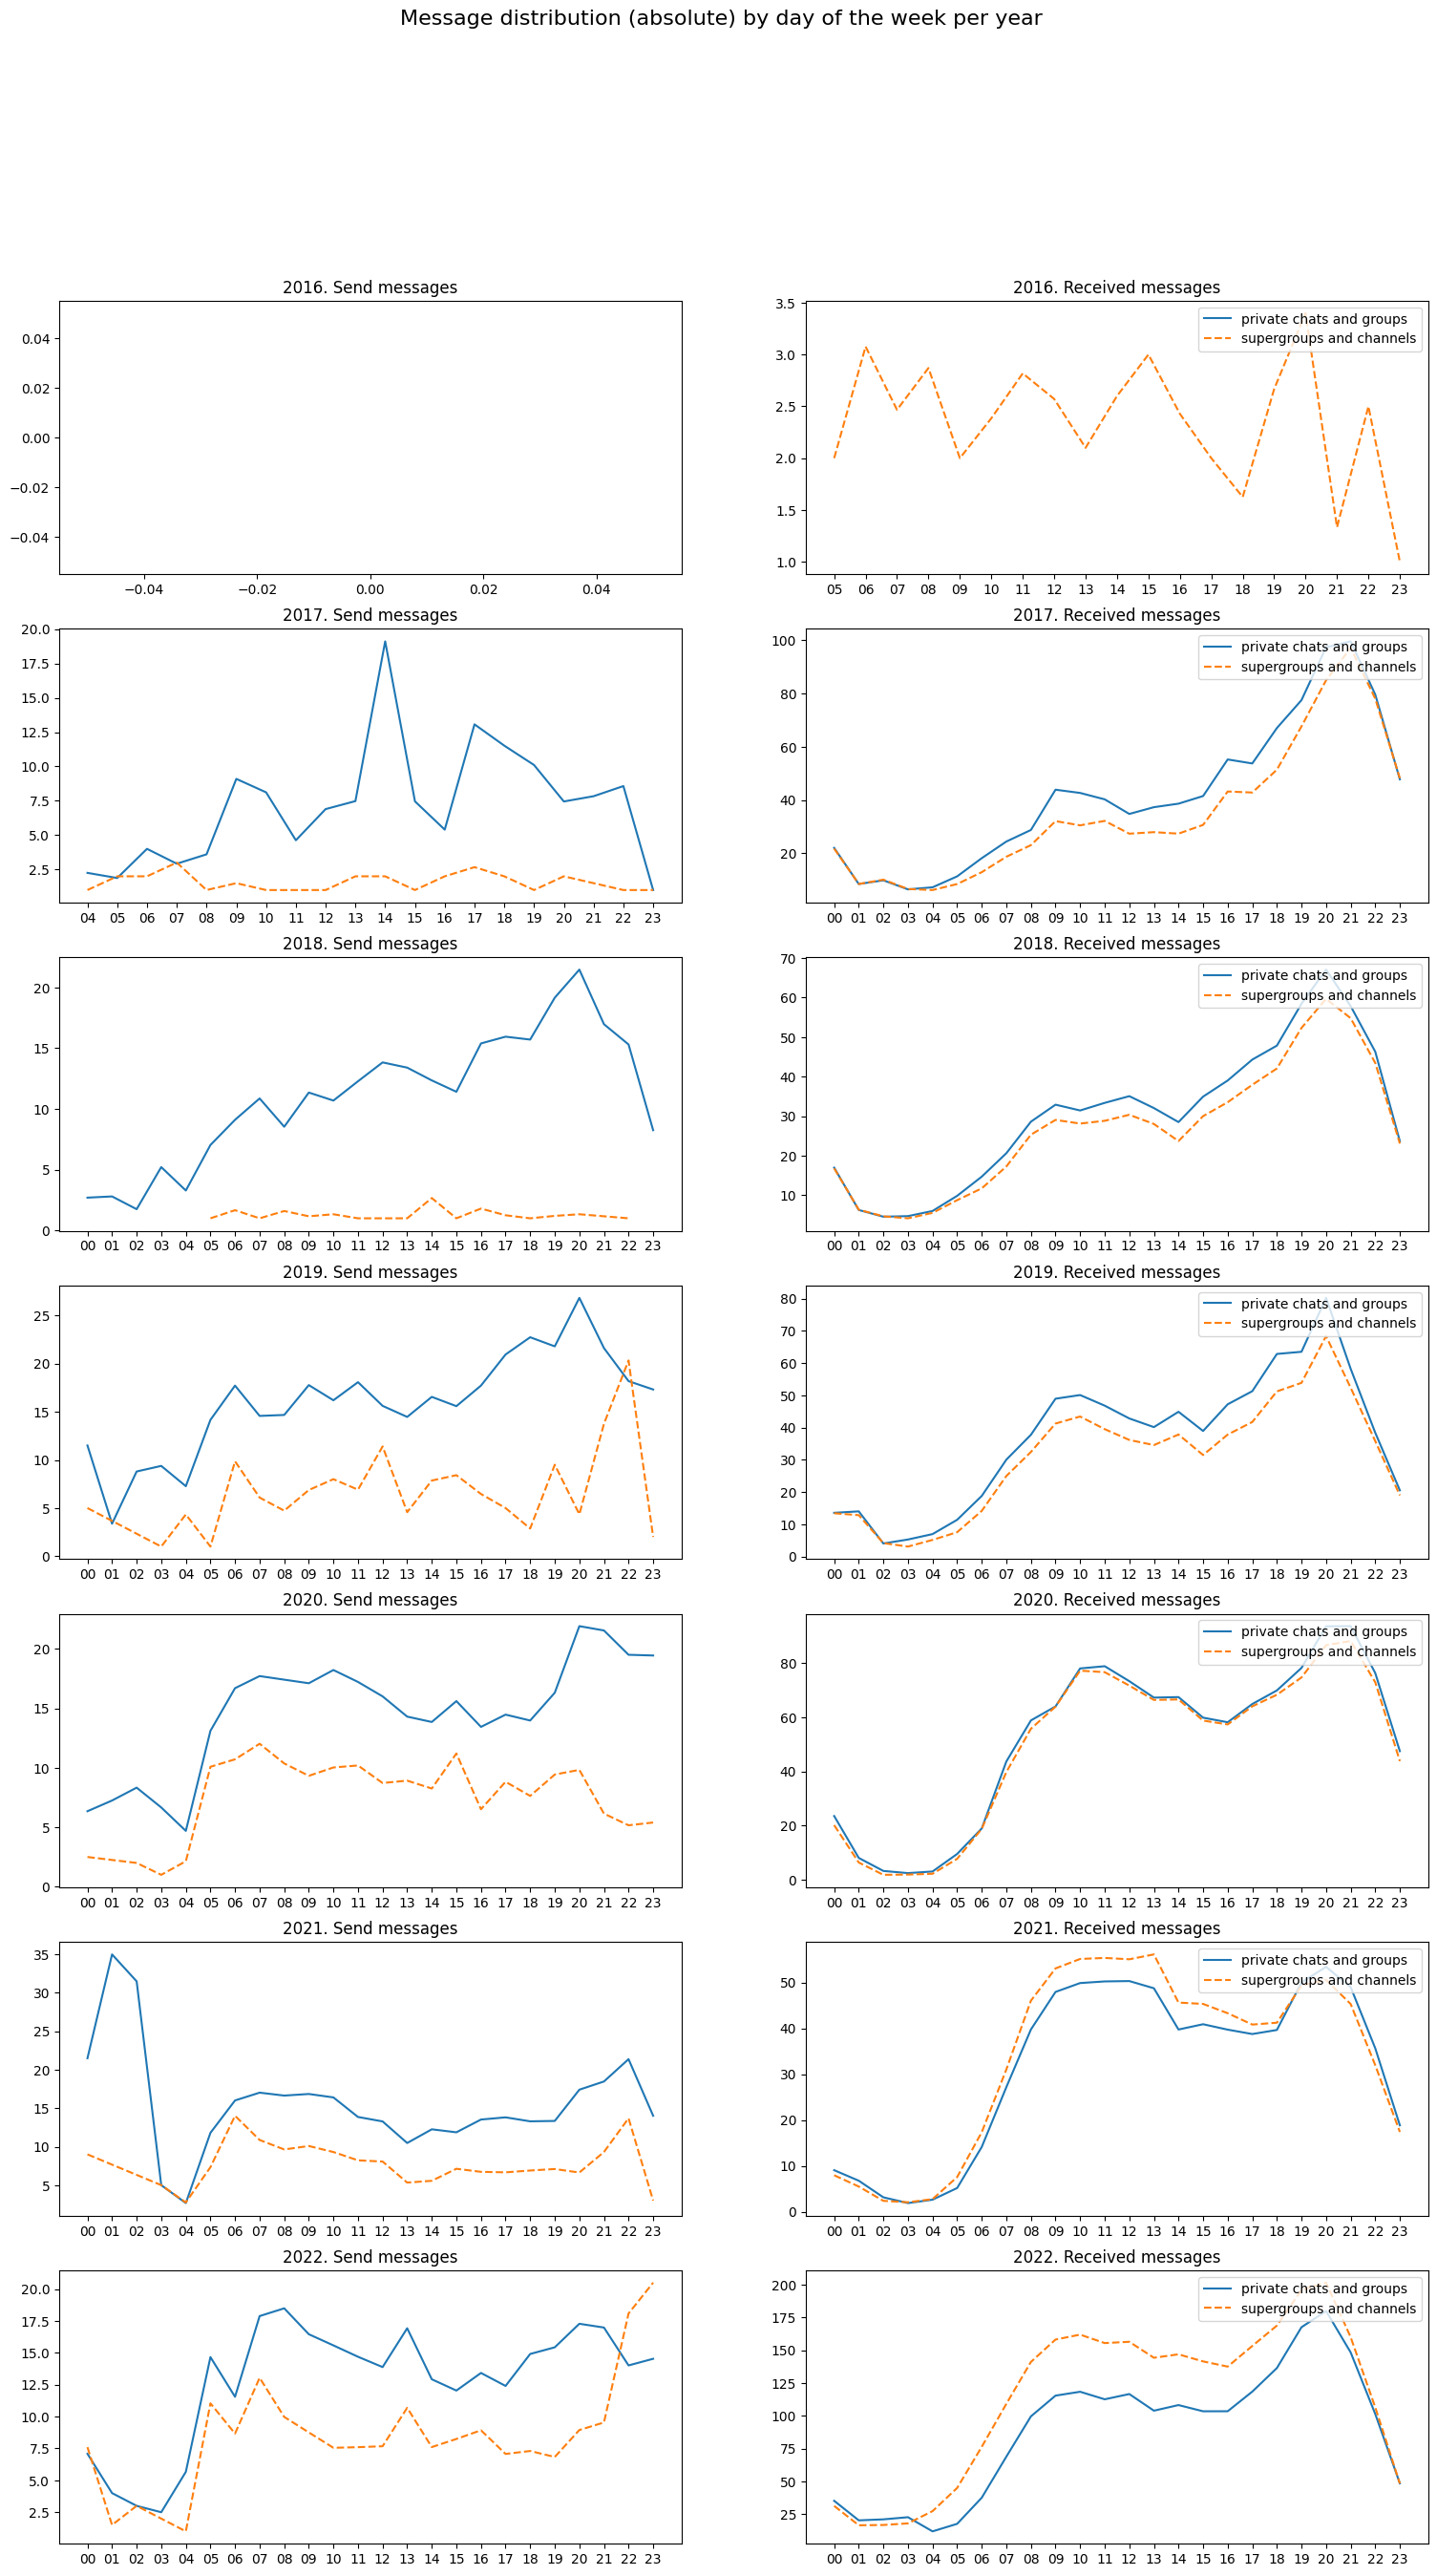

In [369]:
fig, axes = plt.subplots(7, 2)
fig.set_size_inches(18.5, 30.5)
fig.suptitle('Message distribution (absolute) by day of the week per year', fontsize=16)

# 2016
axes[0,0].plot(hpgs[hpgs['year']=='2016']["hour"], hpgs[hpgs['year']=='2016']["id"], label = "private chats and groups", linestyle="-")
axes[0,0].plot(hcgs[hcgs['year']=='2016']["hour"], hcgs[hcgs['year']=='2016']["id"], label = "supergroups and channels", linestyle="--")
axes[0,0].set_title('2016. Send messages')

axes[0,1].plot(hpgr[hpgr['year']=='2016']["hour"], hpgr[hpgr['year']=='2016']["id"], label = "private chats and groups", linestyle="-")
axes[0,1].plot(hcgr[hcgr['year']=='2016']["hour"], hcgr[hcgr['year']=='2016']["id"], label = "supergroups and channels", linestyle="--")
axes[0,1].set_title('2016. Received messages')
# 2017
axes[1,0].plot(hpgs[hpgs['year']=='2017']["hour"], hpgs[hpgs['year']=='2017']["id"], label = "private chats and groups", linestyle="-")
axes[1,0].plot(hcgs[hcgs['year']=='2017']["hour"], hcgs[hcgs['year']=='2017']["id"], label = "supergroups and channels", linestyle="--")
axes[1,0].set_title('2017. Send messages')

axes[1,1].plot(hpgr[hpgr['year']=='2017']["hour"], hpgr[hpgr['year']=='2017']["id"], label = "private chats and groups", linestyle="-")
axes[1,1].plot(hcgr[hcgr['year']=='2017']["hour"], hcgr[hcgr['year']=='2017']["id"], label = "supergroups and channels", linestyle="--")
axes[1,1].set_title('2017. Received messages')
# 2018
axes[2,0].plot(hpgs[hpgs['year']=='2018']["hour"], hpgs[hpgs['year']=='2018']["id"], label = "private chats and groups", linestyle="-")
axes[2,0].plot(hcgs[hcgs['year']=='2018']["hour"], hcgs[hcgs['year']=='2018']["id"], label = "supergroups and channels", linestyle="--")
axes[2,0].set_title('2018. Send messages')

axes[2,1].plot(hpgr[hpgr['year']=='2018']["hour"], hpgr[hpgr['year']=='2018']["id"], label = "private chats and groups", linestyle="-")
axes[2,1].plot(hcgr[hcgr['year']=='2018']["hour"], hcgr[hcgr['year']=='2018']["id"], label = "supergroups and channels", linestyle="--")
axes[2,1].set_title('2018. Received messages')
# 2019
axes[3,0].plot(hpgs[hpgs['year']=='2019']["hour"], hpgs[hpgs['year']=='2019']["id"], label = "private chats and groups", linestyle="-")
axes[3,0].plot(hcgs[hcgs['year']=='2019']["hour"], hcgs[hcgs['year']=='2019']["id"], label = "supergroups and channels", linestyle="--")
axes[3,0].set_title('2019. Send messages')

axes[3,1].plot(hpgr[hpgr['year']=='2019']["hour"], hpgr[hpgr['year']=='2019']["id"], label = "private chats and groups", linestyle="-")
axes[3,1].plot(hcgr[hcgr['year']=='2019']["hour"], hcgr[hcgr['year']=='2019']["id"], label = "supergroups and channels", linestyle="--")
axes[3,1].set_title('2019. Received messages')
# 2020
axes[4,0].plot(hpgs[hpgs['year']=='2020']["hour"], hpgs[hpgs['year']=='2020']["id"], label = "private chats and groups", linestyle="-")
axes[4,0].plot(hcgs[hcgs['year']=='2020']["hour"], hcgs[hcgs['year']=='2020']["id"], label = "supergroups and channels", linestyle="--")
axes[4,0].set_title('2020. Send messages')

axes[4,1].plot(hpgr[hpgr['year']=='2020']["hour"], hpgr[hpgr['year']=='2020']["id"], label = "private chats and groups", linestyle="-")
axes[4,1].plot(hcgr[hcgr['year']=='2020']["hour"], hcgr[hcgr['year']=='2020']["id"], label = "supergroups and channels", linestyle="--")
axes[4,1].set_title('2020. Received messages')
# 2021
axes[5,0].plot(hpgs[hpgs['year']=='2021']["hour"], hpgs[hpgs['year']=='2021']["id"], label = "private chats and groups", linestyle="-")
axes[5,0].plot(hcgs[hcgs['year']=='2021']["hour"], hcgs[hcgs['year']=='2021']["id"], label = "supergroups and channels", linestyle="--")
axes[5,0].set_title('2021. Send messages')
axes[5,1].plot(hpgr[hpgr['year']=='2021']["hour"], hpgr[hpgr['year']=='2021']["id"], label = "private chats and groups", linestyle="-")
axes[5,1].plot(hcgr[hcgr['year']=='2021']["hour"], hcgr[hcgr['year']=='2021']["id"], label = "supergroups and channels", linestyle="--")
axes[5,1].set_title('2021. Received messages')
# 2022
axes[6,0].plot(hpgs[hpgs['year']=='2022']["hour"], hpgs[hpgs['year']=='2022']["id"], label = "private chats and groups", linestyle="-")
axes[6,0].plot(hcgs[hcgs['year']=='2022']["hour"], hcgs[hcgs['year']=='2022']["id"], label = "supergroups and channels", linestyle="--")
axes[6,0].set_title('2022. Send messages')

axes[6,1].plot(hpgr[hpgr['year']=='2022']["hour"], hpgr[hpgr['year']=='2022']["id"], label = "private chats and groups", linestyle="-")
axes[6,1].plot(hcgr[hcgr['year']=='2022']["hour"], hcgr[hcgr['year']=='2022']["id"], label = "supergroups and channels", linestyle="--")
axes[6,1].set_title('2022. Received messages')

for i in range(0,7):
    axes[i,1].legend(loc="upper right")
    
plt.show()

**Результат**: тенденція досить схожа незалежно від року, але помітно відрізняються 2017 рік, де пік припадав на середину дня і 2021 де найбільше було надіслано повідомлень з 12 до 2 ночі.

In [36]:
send_merge = pd.concat([pg_send,channel_sent])
smdf = send_merge[["ddate","year", "hour", "id"]].groupby(["ddate","year",  "hour"],as_index=False).count().groupby(["year", "hour"],as_index=False).mean(numeric_only = True).sort_values("hour")


In [383]:
#!pip install ipympl

In [21]:
from mpl_toolkits.mplot3d import Axes3D


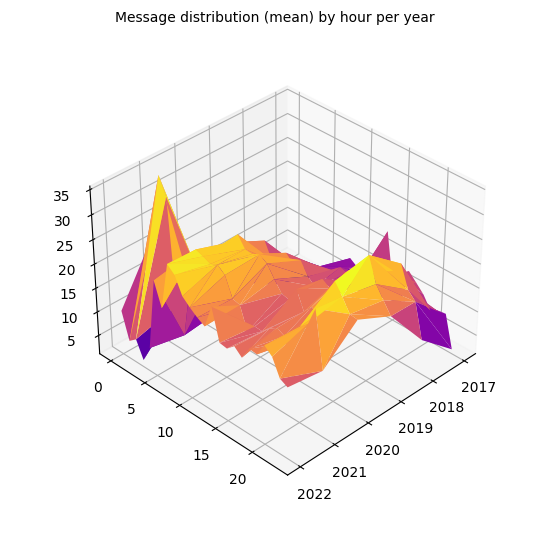

In [26]:
fig =  plt.figure()
fig.suptitle('Message distribution (mean) by hour per year', fontsize=10)

%matplotlib widget

ax = fig.set_size_inches(5.5, 5.5)
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(smdf['year'], smdf['hour'], smdf['id'], cmap=plt.cm.plasma, linewidth=0.2)
ax.view_init(35, 45)
plt.show()

Зображення відношення часу, середньої кількості повідомлень і років у просторі

###### і. Most popular time to send by month 2022

**Мета**: знайти найпопулярніший час відправлення повідомлень відносно місяців 2022 року

In [37]:
smdfbm = send_merge[send_merge["year"]=='2022'][["ddate","year_month", "hour", "id"]].groupby(["ddate","year_month",  "hour"],as_index=False).count().groupby(["year_month", "hour"],as_index=False).mean(numeric_only = True).sort_values("hour")


In [38]:
smdfbm['month'] = smdfbm["year_month"].apply(lambda x: int(x.split('-')[1]))
smdfbm['ih'] = smdfbm["hour"].apply(lambda x: int(x))

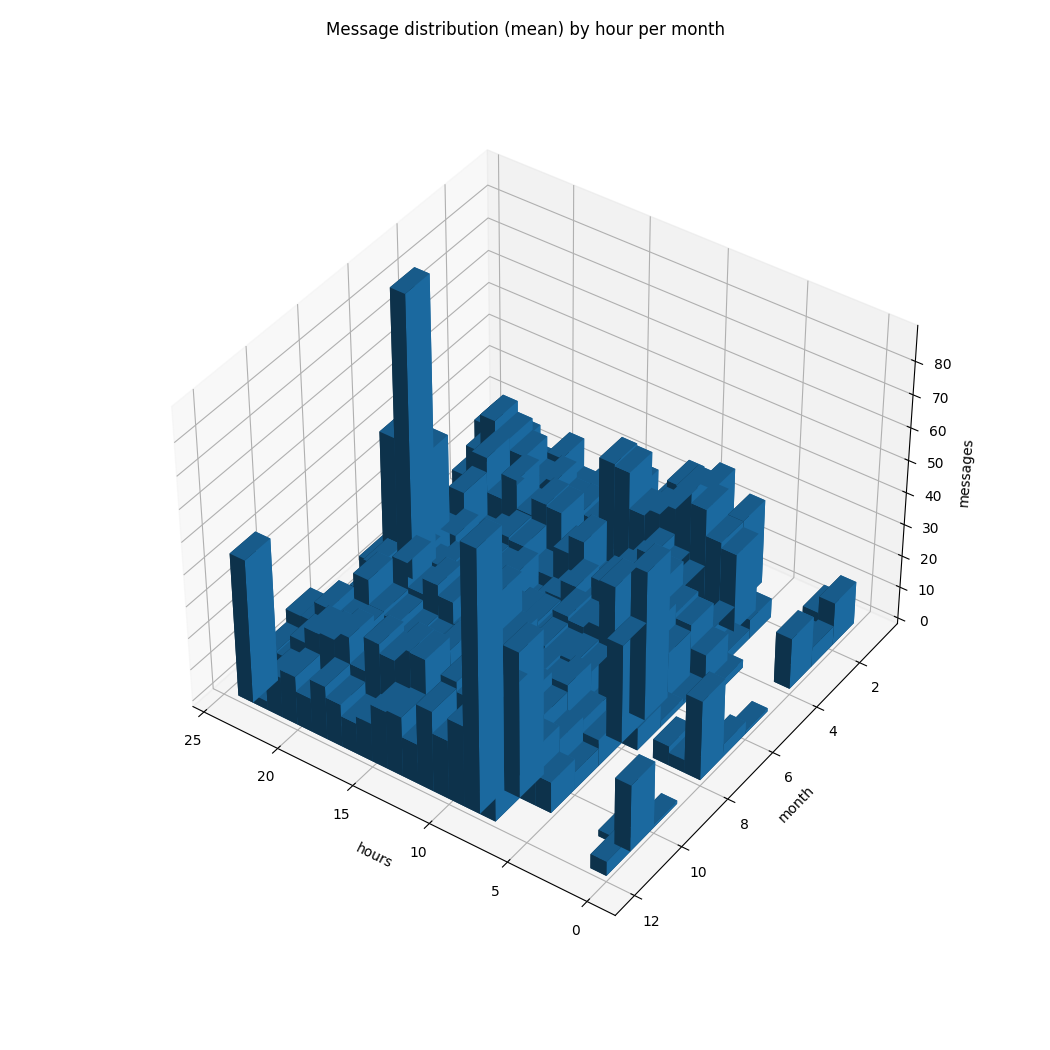

In [40]:
fig = plt.figure()
fig.suptitle('Message distribution (mean) by hour per month')
ax1 = fig.set_size_inches(10.5, 10.5)
ax1 = fig.add_subplot(projection='3d')
ax1.bar3d(smdfbm["ih"], smdfbm["month"], np.zeros_like(smdfbm["id"]), np.ones(len(smdfbm["ih"])), np.ones(len(smdfbm["month"])), smdfbm["id"], shade=True)
ax1.view_init(40, 125)
ax1.set_xlabel('hours')
ax1.set_ylabel('month')
ax1.set_zlabel('messages')
plt.show()


Зображення залежності у просторі

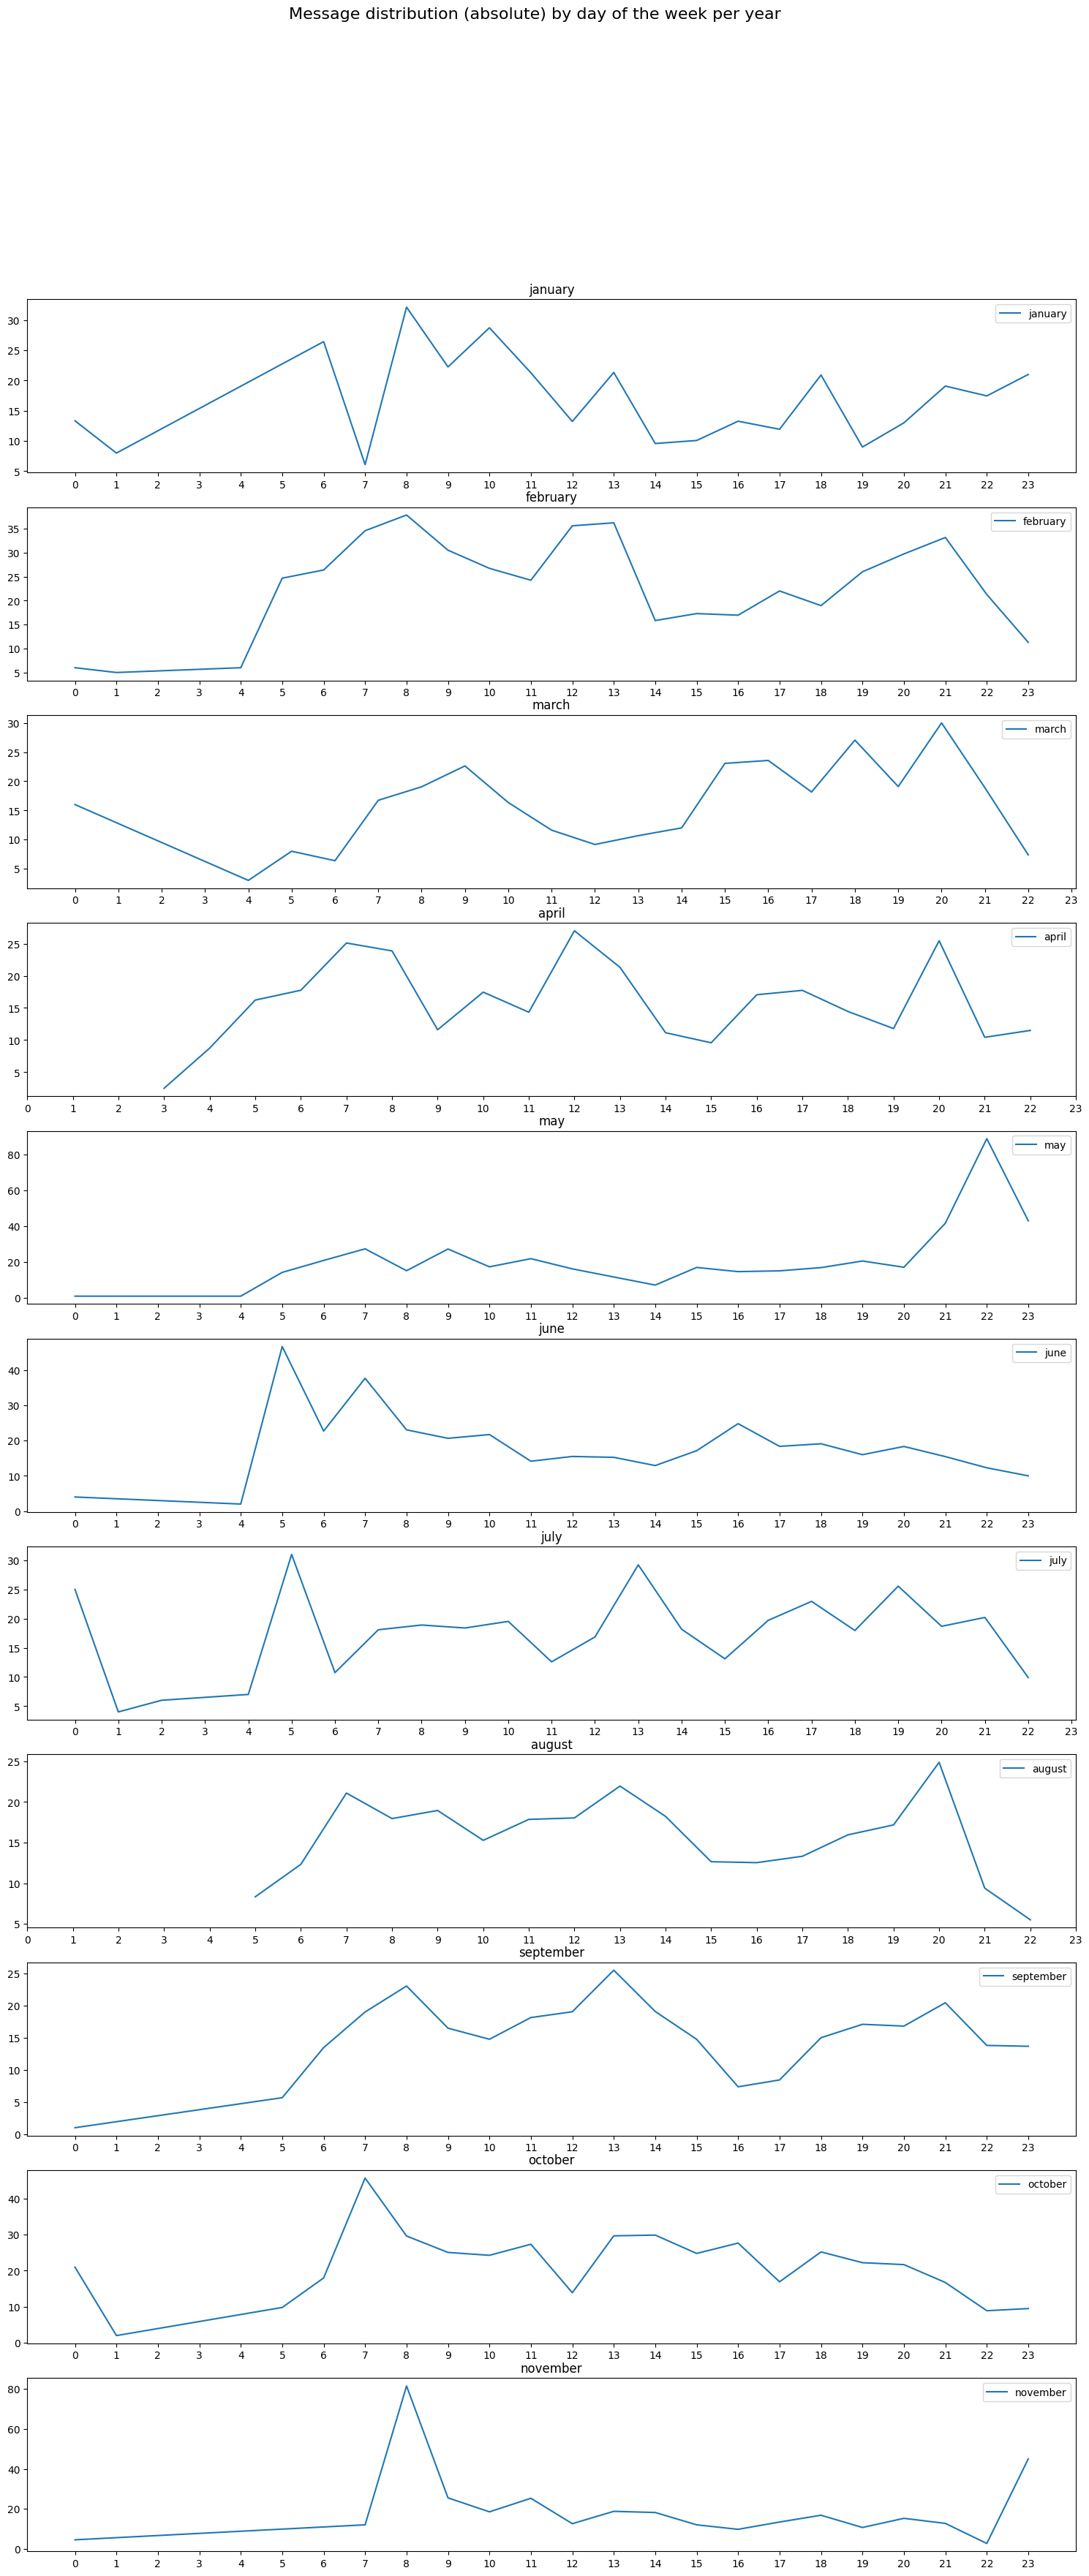

In [55]:
fig, axes = plt.subplots(11)
fig.set_size_inches(18.5, 40)
fig.suptitle('Message distribution (absolute) by day of the week per year', fontsize=16)
labels = ["january","february","march","april","may","june","july", "august","september","october","november"]

axes[0].plot(smdfbm[smdfbm['month']==1]["ih"], smdfbm[smdfbm['month']==1]["id"], label = "january", linestyle="-")
axes[1].plot(smdfbm[smdfbm['month']==2]["ih"], smdfbm[smdfbm['month']==2]["id"], label = "february", linestyle="-")
axes[2].plot(smdfbm[smdfbm['month']==3]["ih"], smdfbm[smdfbm['month']==3]["id"], label = "march", linestyle="-")
axes[3].plot(smdfbm[smdfbm['month']==4]["ih"], smdfbm[smdfbm['month']==4]["id"], label = "april", linestyle="-")
axes[4].plot(smdfbm[smdfbm['month']==5]["ih"], smdfbm[smdfbm['month']==5]["id"], label = "may", linestyle="-")
axes[5].plot(smdfbm[smdfbm['month']==6]["ih"], smdfbm[smdfbm['month']==6]["id"], label = "june", linestyle="-")
axes[6].plot(smdfbm[smdfbm['month']==7]["ih"], smdfbm[smdfbm['month']==7]["id"], label = "july", linestyle="-")
axes[7].plot(smdfbm[smdfbm['month']==8]["ih"], smdfbm[smdfbm['month']==8]["id"], label = "august", linestyle="-")
axes[8].plot(smdfbm[smdfbm['month']==9]["ih"], smdfbm[smdfbm['month']==9]["id"], label = "september", linestyle="-")
axes[9].plot(smdfbm[smdfbm['month']==10]["ih"], smdfbm[smdfbm['month']==10]["id"], label = "october", linestyle="-")
axes[10].plot(smdfbm[smdfbm['month']==11]["ih"], smdfbm[smdfbm['month']==11]["id"], label = "november", linestyle="-")

for i in range(0,11):
    axes[i].set_title(labels[i])
    axes[i].set_xticks(range(0,24))
    axes[i].legend(loc="upper right")

plt.show()


**Результат**: упродовж місяців окрім липня і жовтня зберігалась тенденція надсилання та отримання повідомлень здебільше зранку і ввечері.

##### Reactions

**Мета**: визначити найпопулярнішу реакцію

In [ ]:
import json

In [ ]:
df_meta_crop = df_meta[["dialog_id", "name", "type"]].drop_duplicates()
df_merged = df.merge(df_meta_crop,how='left', on='dialog_id')

In [ ]:
df_merged['reaction_object'] = df_merged['reaction'].apply(lambda x: json.loads(x.replace("'", '"')))


In [ ]:
all_reaction = [x for y in df_merged['reaction_object'].values for x in y for z in x]

In [ ]:
all_reaction_just_df = pd.DataFrame(data=all_reaction)
group_reaction = all_reaction_just_df.groupby("reaction", as_index=False)["count"].sum().sort_values("count")


In [60]:
group_reaction

reaction      count
17      👨‍💻          2
33        😴          4
31        😭         16
18        👻         62
12        👀         70
8         🎃         88
35        🤓        218
19        💋       3712
6         🍓       4524
45        🥱       5168
25        🖕      10688
39        🤨      11458
29        😐      14666
28        😍      17128
46        🥴      20234
7         🍾      20526
22        💯      26954
4         🌭      28392
24        🕊      28600
20        💔      35378
13        👌      47406
11        🐳      53790
10        🏆      61688
27        😈      86696
5         🍌      93106
0         ⚡     180382
40        🤩     193408
3         🌚     318804
9         🎉     721316
44        🥰     991658
38        🤣    1037866
2       ❤‍🔥    1124920
34        🙏    2201922
16        👏    2246790
42        🤮    2412378
43        🤯    2475328
36        🤔    3291828
32        😱    3713798
21        💩    5173028
15        👎    9640224
37        🤡   26193818
23        🔥   42742018
26        😁   55530588
30        😢   75428230
41        🤬  101086996
1         ❤  128510214
14        👍  196444586

**Результат**: найпопулярнішою реакцією є 👍

Примітка: подальша робота з реакціями не проводилась, тому що вони некоректно відображались у графіках

#### Some dialogs analysis

##### a. distribution of message by day of the week 

**Мета**: переглянути частоту повідомлень відносно дня тижня з найпопулярнішими діалогами

In [63]:
df_selected_dialogs = df_merged[(df_merged['name']=="Маргарита")|(df_merged['name']=="Татьяна")|(df_merged['name']=="Оленка")|(df_merged['name']=="Монстрик")|(df_merged['name']=="👆 Mozgi_rest 👇")]


In [64]:
group_dialogs = df_selected_dialogs[["ddate","name", "id", "w_day", "nw_day"]].groupby(["ddate", "name", "w_day", "nw_day"], as_index=False).count().groupby(["name", "w_day", "nw_day"],  as_index=False).mean(numeric_only=True).sort_values("nw_day")[["nw_day", "w_day", "name", "id"]]

In [65]:
import seaborn as sns

C:\Users\Alexandra\AppData\Local\Temp\ipykernel_4580\2377475353.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  piv =  group_dialogs.pivot("nw_day", "name", "id")
D:\Master\Computing social science\3\telegram-dialogs-analysis-v2\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 128070 (\N{WHITE UP POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.draw()
D:\Master\Computing social science\3\telegram-dialogs-analysis-v2\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.draw()
D:\Master\Computing social science\3\telegram-dialogs-analysis-v2\.venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128070 (\N{WHITE UP POINTING BACKHAND INDEX}) missing from current font.
  func(*args, **kwargs)
D:\Master\Computing social science\3\telegram-dialogs-analysis-v2\.venv\lib\site-packages\IPytho

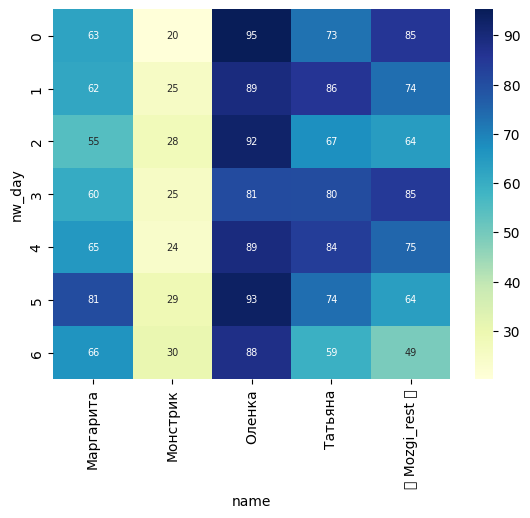

In [100]:
piv =  group_dialogs.pivot("nw_day", "name", "id")
p1 = sns.heatmap(piv, annot=True, annot_kws={"size": 7},cmap="YlGnBu")

**Результат**: Для частини діалогів характерно збільшення кількості повідомлень на вихідні, але загалом повідомлення розподілені більш менш рівномірно 

##### b. distribution of message by hour

**Мета**: переглянути частоту повідомлень відносно години з найпопулярнішими діалогами

In [83]:
df_selected_dialogs["hours"] = df_selected_dialogs["dtime"].apply(lambda x: x.split(':')[0])

C:\Users\Alexandra\AppData\Local\Temp\ipykernel_4580\990145592.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  piv =  group_dialogs_by_time.pivot("hours", "name", "id")
D:\Master\Computing social science\3\telegram-dialogs-analysis-v2\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 128070 (\N{WHITE UP POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.draw()
D:\Master\Computing social science\3\telegram-dialogs-analysis-v2\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 128071 (\N{WHITE DOWN POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.draw()
D:\Master\Computing social science\3\telegram-dialogs-analysis-v2\.venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128070 (\N{WHITE UP POINTING BACKHAND INDEX}) missing from current font.
  func(*args, **kwargs)
D:\Master\Computing social science\3\telegram-dialogs-analysis-v2\.venv\lib\site-packages\

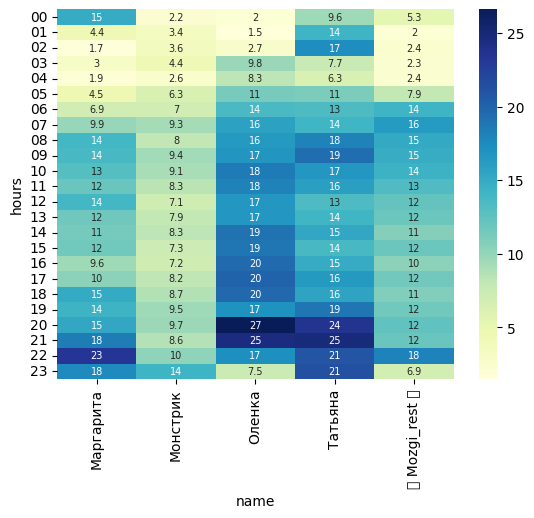

In [102]:
group_dialogs_by_time = df_selected_dialogs[["ddate","name", "id", "hours"]].groupby(["ddate", "name", "hours"], as_index=False).count().groupby(["name", "hours"],  as_index=False).mean(numeric_only=True).sort_values("hours")
piv =  group_dialogs_by_time.pivot("hours", "name", "id")
p2 = sns.heatmap(piv, annot=True, annot_kws={"size": 7},cmap="YlGnBu")

**Результат**: як і очікувалось, переважна всі діалоги найбільш активні у вечірній час. 

##### Work with message text


In [45]:
#!pip install nltk

In [42]:
import nltk
from nltk.util import ngrams
from nltk.util import bigrams

##### Sended

In [47]:
sended_text = pg_send[pg_send["type"]=='text']
sended_text = sended_text[sended_text['message'].notna()]

In [48]:
def get_ngrams(row, n):
    splited = row.lower().split(' ')
    while len(splited)<n:
        splited.append("")
    return list(ngrams(splited, n))

In [49]:
uninterest_words = ['в', "у", "а", "і", "й", "и", "бо", "але", "ну", "б", 
                    "би", "бы", "та", "з", "с", "типу", "типа", "ж", "же"]

In [41]:
sended_text["bigrams"] = sended_text['message'].apply(lambda row: get_ngrams(row, 2))
array_bigram  = [y for x in sended_text["bigrams"].values for y in x]
len(array_bigram)

865012

In [84]:
array_bigram  = [(a,b) for (a,b) in array_bigram if a !='' and b!='']
array_bigram_filtered  = [(a,b) for (a,b) in array_bigram if not(a in uninterest_words) and  not(b in uninterest_words)]
fdist = nltk.FreqDist(array_bigram_filtered)


##### a. Onegrams and bigrams some verb analyze

**Мета**: знайти частоту уживання деяких дієслів

In [50]:
sended_text["onegrams"] = sended_text['message'].apply(lambda row: get_ngrams(row, 1))
array_onegrams= [y for x in sended_text["onegrams"].values for y in x]
array_onegrams  = [a for (a,) in array_onegrams if a !='']

In [51]:
selected_onegrams = ['хочу', "знаю", "буду", "люблю", "подобається", "роблю", "розумію", "думаю", "впевнена", "їхати"]
array_onegrams_selected = [a for a in array_onegrams if a in selected_onegrams]
fdist = nltk.FreqDist(array_onegrams_selected)
df_verb_onegrams = pd.DataFrame(data=[{'word':x, 'count':y} for (x,y) in fdist.most_common()])


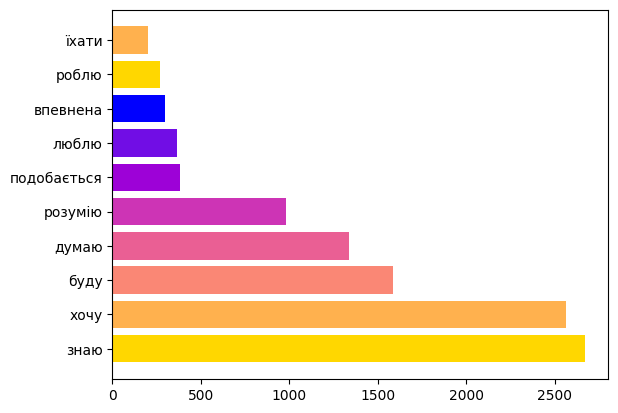

In [41]:
y_pos = np.arange(len(df_verb_onegrams))

# plot it# Create horizontal bars
plt.barh(y_pos, df_verb_onegrams['count'], color=["#ffd700","#ffb14e","#fa8775","#ea5f94","#cd34b5","#9d02d7","#710de5","#0000ff"])
# Create names on the x-axis
plt.yticks(y_pos, df_verb_onegrams['word'])

plt.show()

**Результат**: найуживанішим є дієслово знаю та хочу

**Мета**: проаналізувати чи вживається це слово з часткою не частіше

In [82]:
array_bigrams_selected_not = [b for (a, b) in array_bigram if (b in selected_onegrams)&(a=='не')]
array_bigrams_selected_without_not = [b for (a, b) in array_bigram if  (b in selected_onegrams)&(a!='не')]

fdist1 = nltk.FreqDist(array_bigrams_selected_not)
fdist2 = nltk.FreqDist(array_bigrams_selected_without_not)
df_verb_bigrams1 = pd.DataFrame(data=[{'word':x, 'count_with_no':y} for (x,y) in fdist1.most_common()])
df_verb_bigrams2 = pd.DataFrame(data=[{'word':x, 'count_without':y} for (x,y) in fdist2.most_common()])
merge = df_verb_bigrams1.merge(df_verb_bigrams2, how='inner', on='word')

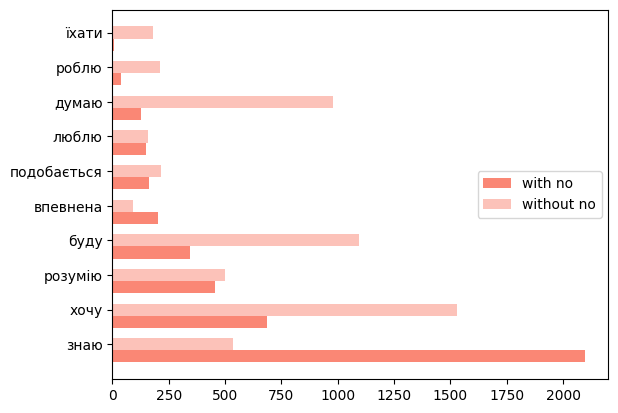

In [83]:
ind = np.arange(merge.shape[0])
width = 0.35
colors = ["#fa8775"]

fig, ax = plt.subplots()
a = ax.barh(ind, merge['count_with_no'], width, color = colors) # plot a vals
b = ax.barh(ind + width, merge['count_without'], width, color = colors, alpha=0.5)  # plot b vals
ax.set_yticks(ind + width)  # position axis ticks
ax.set_yticklabels(merge['word'])  # set them to the names
ax.legend((a[0], b[0]), ['with no', 'without no'], loc='center right')



plt.show()

**Результат**: дієслово хочу частіше вживається без часткою не, а знаю - навпаки

##### b. bigrams and trigrams some verb analyze 

**Мета**: знайти, що саме не хочеться і що хочеться

In [55]:
sended_text["trigrams"] = sended_text['message'].apply(lambda row: get_ngrams(row, 3))

In [56]:
array_trigram = [y for x in sended_text["trigrams"].values for y in x]

In [57]:
stop_words = ["на", "", "щоб", "ще", "що","ні","его",'я?',"-","трошки" "по","что","как","чи","до", "в", "як", "к", "ли", "я", "чтобы", "вже", "😂", "😅","не", "так"]
array_want =  [c for (a, b, c) in array_trigram if (b =='хочу') and (a!='не') and not(c in stop_words)]
fdist1 = nltk.FreqDist(array_want)
df_want_verb_bigrams = pd.DataFrame(data=[{'word':x, 'count':y} for (x,y) in fdist1.most_common(12)])

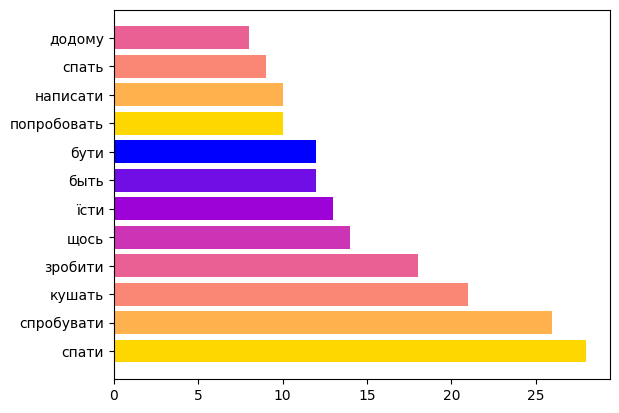

In [58]:
y_pos = np.arange(len(df_want_verb_bigrams))

# plot it# Create horizontal bars
plt.barh(y_pos, df_want_verb_bigrams['count'], color=["#ffd700","#ffb14e","#fa8775","#ea5f94","#cd34b5","#9d02d7","#710de5","#0000ff"])
# Create names on the x-axis
plt.yticks(y_pos, df_want_verb_bigrams['word'])

plt.show()

**Результат**: Як видно з діаграми найчастіше зустрічається словосполучення "хочу спати"

In [59]:
array_trigrams_not_want= [c for (a, b, c) in array_trigram if (b =='хочу') and (a =='не') and not(c in stop_words)]
fdist1 = nltk.FreqDist(array_trigrams_not_want)
df_not_want_verb=pd.DataFrame(data=[{'word':x, 'count':y} for (x,y) in fdist1.most_common(12)])

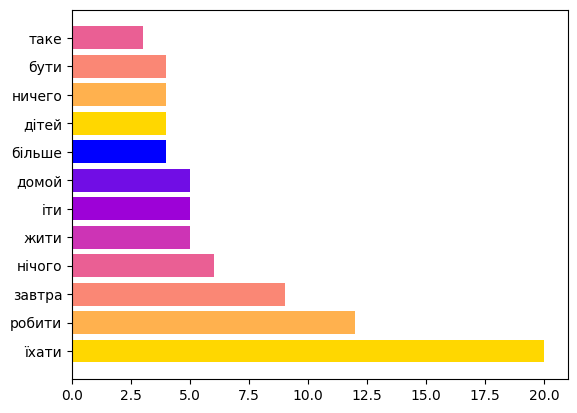

In [219]:
y_pos = np.arange(len(df_want_verb_bigrams))

# plot it# Create horizontal bars
plt.barh(y_pos, df_not_want_verb['count'], color=["#ffd700","#ffb14e","#fa8775","#ea5f94","#cd34b5","#9d02d7","#710de5","#0000ff"])
# Create names on the x-axis
plt.yticks(y_pos, df_not_want_verb['word'])

plt.show()

**Результат**: Як видно з діаграми найчастіше зустрічається словосполучення "не хочу їхати"

##### Last year separate

**Мета**: Окремо дослідити розподіл для 2022 року

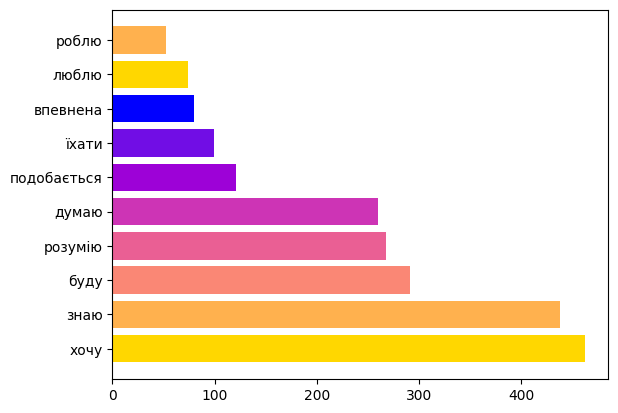

In [60]:
array_onegrams_year= [y for x in sended_text[sended_text["year"]=="2022"]["onegrams"].values for y in x]
array_onegrams_year  = [a for (a,) in array_onegrams_year if a !='']
array_onegrams_selected_year = [a for a in array_onegrams_year if a in selected_onegrams]
fdist = nltk.FreqDist(array_onegrams_selected_year)

df_verb_onegrams = pd.DataFrame(data=[{'word':x, 'count':y} for (x,y) in fdist.most_common()])
y_pos = np.arange(len(df_verb_onegrams))

plt.barh(y_pos, df_verb_onegrams['count'], color=["#ffd700","#ffb14e","#fa8775","#ea5f94","#cd34b5","#9d02d7","#710de5","#0000ff"])
plt.yticks(y_pos, df_verb_onegrams['word'])

plt.show()

**Результат 1**: Найчастіше зустрічається дієслово хочу

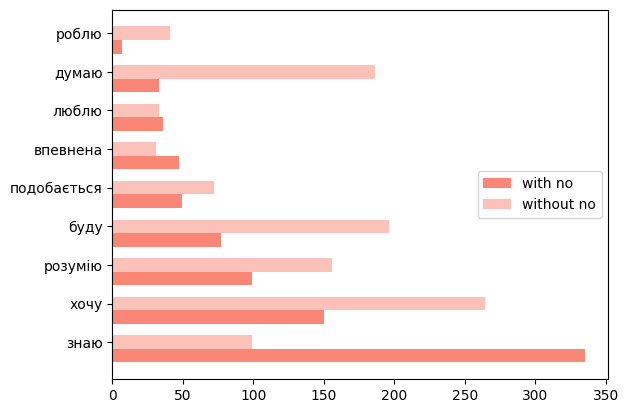

In [61]:
array_bigram_year  = [y for x in sended_text[sended_text["year"]=="2022"]["bigrams"].values for y in x]
array_bigram_year  = [(a,b) for (a,b) in array_bigram_year if a !='' and b!='']
array_bigrams_selected_not_year = [b for (a, b) in array_bigram_year if (b in selected_onegrams)&(a=='не')]
array_bigrams_selected_without_not_year = [b for (a, b) in array_bigram_year if  (b in selected_onegrams)&(a!='не')]

fdist1 = nltk.FreqDist(array_bigrams_selected_not_year)
fdist2 = nltk.FreqDist(array_bigrams_selected_without_not_year)
df_verb_bigrams1 = pd.DataFrame(data=[{'word':x, 'count_with_no':y} for (x,y) in fdist1.most_common()])
df_verb_bigrams2 = pd.DataFrame(data=[{'word':x, 'count_without':y} for (x,y) in fdist2.most_common()])
merge = df_verb_bigrams1.merge(df_verb_bigrams2, how='inner', on='word')

ind = np.arange(merge.shape[0])
width = 0.35
colors = ["#fa8775"]

fig, ax = plt.subplots()
a = ax.barh(ind, merge['count_with_no'], width, color = colors) # plot a vals
b = ax.barh(ind + width, merge['count_without'], width, color = colors, alpha=0.5)  # plot b vals
ax.set_yticks(ind + width)  # position axis ticks
ax.set_yticklabels(merge['word'])  # set them to the names
ax.legend((a[0], b[0]), ['with no', 'without no'], loc='center right')



plt.show()

**Результат 2**: Дієслово хочу вживається частіше без частки не.

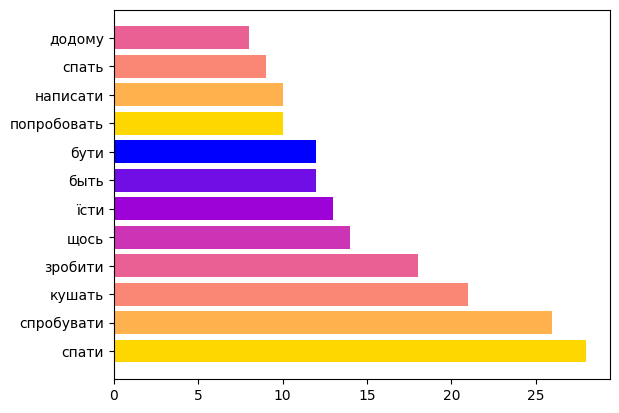

In [85]:
array_want_year = [c for (a, b, c) in array_trigram if (b =='хочу') and (a!='не') and not(c in stop_words)]

fdist1 = nltk.FreqDist(array_want_year)
df_want_verb_bigrams = pd.DataFrame(data=[{'word':x, 'count':y} for (x,y) in fdist1.most_common(12)])
y_pos = np.arange(len(df_want_verb_bigrams))

# plot it# Create horizontal bars
plt.barh(y_pos, df_want_verb_bigrams['count'], color=["#ffd700","#ffb14e","#fa8775","#ea5f94","#cd34b5","#9d02d7","#710de5","#0000ff"])
# Create names on the x-axis
plt.yticks(y_pos, df_want_verb_bigrams['word'])

plt.show()

**Результат 3**: Найчастіше так само зустрічається словосполучення "хочу спати"

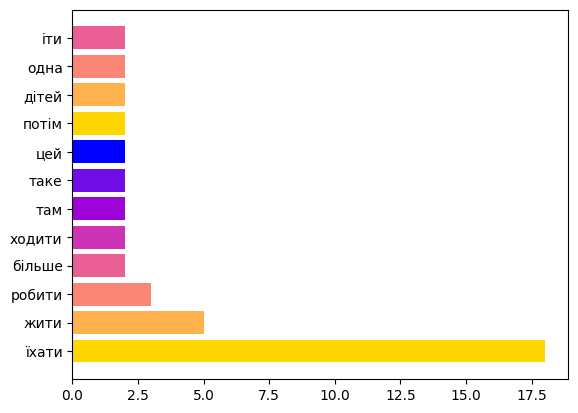

In [86]:
array_trigram_year = [y for x in  sended_text[sended_text["year"]=="2022"]["trigrams"].values for y in x]
array_trigrams_not_want_year= [c for (a, b, c) in array_trigram_year if (b =='хочу') and (a =='не') and not(c in stop_words)]
fdist1 = nltk.FreqDist(array_trigrams_not_want_year)

df_not_want_verb=pd.DataFrame(data=[{'word':x, 'count':y} for (x,y) in fdist1.most_common(12)])
y_pos = np.arange(len(df_want_verb_bigrams))

# plot it# Create horizontal bars
plt.barh(y_pos, df_not_want_verb['count'], color=["#ffd700","#ffb14e","#fa8775","#ea5f94","#cd34b5","#9d02d7","#710de5","#0000ff"])
# Create names on the x-axis
plt.yticks(y_pos, df_not_want_verb['word'])

plt.show()

**Результат 3**: Найчастіше так само зустрічається словосполучення "не хочу"

**Результат**: Найчастіше дієслово хочу в 2022 році вживається аналогічно до всіх років разом 

#### Received messages

**Мета**: знайти частоту уживання деяких дієслів

In [62]:
received_text = pg_received[(pg_received['year']=='2022')&(pg_received["type"]=='text')]

In [65]:
received_text = received_text[received_text['message'].notna()]

In [66]:
received_text["onegrams"] = received_text['message'].apply(lambda row: get_ngrams(row, 1))

In [67]:
received_text["bigrams"] = received_text['message'].apply(lambda row: get_ngrams(row, 2))

In [68]:
received_text["trigrams"] = received_text['message'].apply(lambda row: get_ngrams(row, 3))

In [69]:
array_onegrams_r= [y for x in received_text["onegrams"].values for y in x]
array_onegrams_r  = [a for (a,) in array_onegrams_r if a !='']
array_onegrams_selected_r = [a for a in array_onegrams_r if a in selected_onegrams]
fdist = nltk.FreqDist(array_onegrams_selected_r)
df_verb_onegrams = pd.DataFrame(data=[{'word':x, 'count':y} for (x,y) in fdist.most_common(12)])

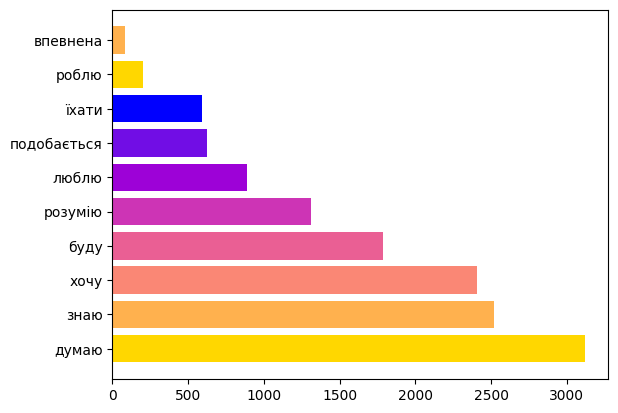

In [71]:
%matplotlib inline
y_pos = np.arange(len(df_verb_onegrams))

# plot it# Create horizontal bars
plt.barh(y_pos, df_verb_onegrams['count'], color=["#ffd700","#ffb14e","#fa8775","#ea5f94","#cd34b5","#9d02d7","#710de5","#0000ff"])
# Create names on the x-axis
plt.yticks(y_pos, df_verb_onegrams['word'])

plt.show()


**Результат**: найчастіше вживається дієслово думаю

**Мета:** проаналізувати чи вживається це слово з часткою не частіше

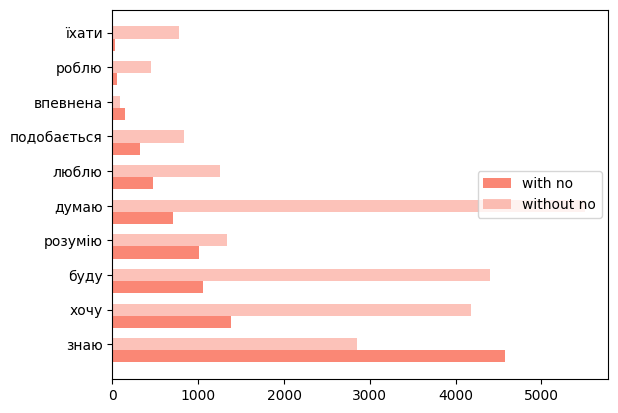

In [72]:
array_bigrams_selected_not_r = [b for (a, b) in array_bigram_r if (b in selected_onegrams)&(a=='не')]
array_bigrams_selected_without_not_r = [b for (a, b) in array_bigram_r if  (b in selected_onegrams)&(a!='не')]

fdist1 = nltk.FreqDist(array_bigrams_selected_not_r)
fdist2 = nltk.FreqDist(array_bigrams_selected_without_not_r)
df_verb_bigrams1 = pd.DataFrame(data=[{'word':x, 'count_with_no':y} for (x,y) in fdist1.most_common(12)])
df_verb_bigrams2 = pd.DataFrame(data=[{'word':x, 'count_without':y} for (x,y) in fdist2.most_common(12)])
merge = df_verb_bigrams1.merge(df_verb_bigrams2, how='inner', on='word')
ind = np.arange(merge.shape[0])
width = 0.35
colors = ["#fa8775"]

fig, ax = plt.subplots()
a = ax.barh(ind, merge['count_with_no'], width, color = colors) # plot a vals
b = ax.barh(ind + width, merge['count_without'], width, color = colors, alpha=0.5)  # plot b vals
ax.set_yticks(ind + width)  # position axis ticks
ax.set_yticklabels(merge['word'])  # set them to the names
ax.legend((a[0], b[0]), ['with no', 'without no'], loc='center right')



plt.show()

**Результат**: більшість дієслів вживається без частки "не", окрім знаю

**Мета**: знайти, що саме не хочеться і що хочеться

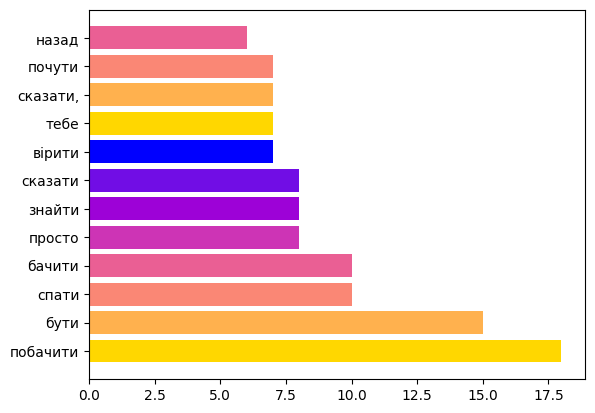

In [76]:
array_trigram_r = [y for x in received_text["trigrams"].values for y in x]
stop_words = ["на", "", "щоб", "ще", "що","ні","его",'я?',"-","трошки" "по","что","как","шоб","їх","собі", "чи","до", "в","з","і","це", "як", "к", "ли", "я", "чтобы", "вже", "😂", "😅","не", "так"]
array_want_r =  [c for (a, b, c) in array_trigram_r if (b =='хочу') and (a!='не') and not(c in stop_words)]
fdist1 = nltk.FreqDist(array_want_r)
df_want_verb_bigrams = pd.DataFrame(data=[{'word':x, 'count':y} for (x,y) in fdist1.most_common(12)])
y_pos = np.arange(len(df_want_verb_bigrams))

# plot it# Create horizontal bars
plt.barh(y_pos, df_want_verb_bigrams['count'], color=["#ffd700","#ffb14e","#fa8775","#ea5f94","#cd34b5","#9d02d7","#710de5","#0000ff"])
# Create names on the x-axis
plt.yticks(y_pos, df_want_verb_bigrams['word'])

plt.show()

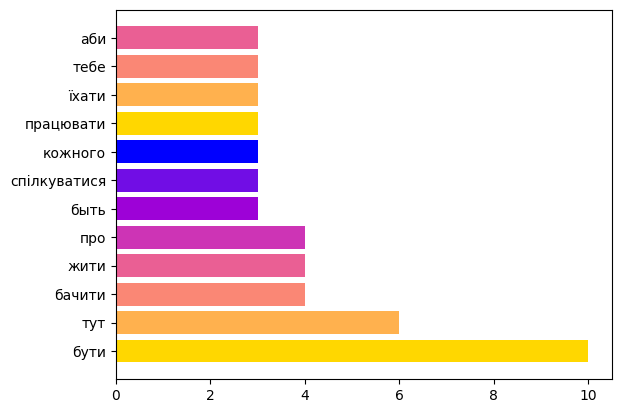

In [77]:
array_trigrams_not_want_r = [c for (a, b, c) in array_trigram_r if (b =='хочу') and (a =='не') and not(c in stop_words)]
fdist1 = nltk.FreqDist(array_trigrams_not_want_r)
df_not_want_verb=pd.DataFrame(data=[{'word':x, 'count':y} for (x,y) in fdist1.most_common(12)])

y_pos = np.arange(len(df_want_verb_bigrams))

# plot it# Create horizontal bars
plt.barh(y_pos, df_not_want_verb['count'], color=["#ffd700","#ffb14e","#fa8775","#ea5f94","#cd34b5","#9d02d7","#710de5","#0000ff"])
# Create names on the x-axis
plt.yticks(y_pos, df_not_want_verb['word'])

plt.show()

**Результат**: найчастіше мої співрозмовники хочуть щось побачити і не хочуть бути

In [85]:
#!pip install networkx

**Мета**: основна мета полягає в тому, щоб спробувати побудову графа

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
sended_text["bigrams"].valuesS

array([list([('я', 'поняла'), ('поняла', 'что'), ('что', 'да,'), ('да,', 'но'), ('но', 'могу'), ('могу', 'ошибаться')]),
       list([('конкурировать', 'мозу?)')]),
       list([('ещё', 'как'), ('как', 'вариант'), ('вариант', 'можно'), ('можно', 'информационный'), ('информационный', 'ресурс'), ('ресурс', 'на'), ('на', 'какую-нибудь'), ('какую-нибудь', 'тематику')]),
       ..., list([('/stop', '')]), list([('/quizzes', '')]),
       list([('/start', '')])], dtype=object)

In [63]:
array_bigram =  [y for x in sended_text[sended_text["year"]=="2022"]["bigrams"].values for y in x]
array_bigram  = [(a,b) for (a,b) in array_bigram if a !='' and b!='']
array_bigram  = [(a,b) for (a,b) in array_bigram if not(a in uninterest_words) and  not(b in uninterest_words)]
fdist_1 = nltk.FreqDist(array_bigram)

df_graph = pd.DataFrame(data = [{'to': x,'from':y} for ((x, y), c) in fdist_1.most_common(60) ])

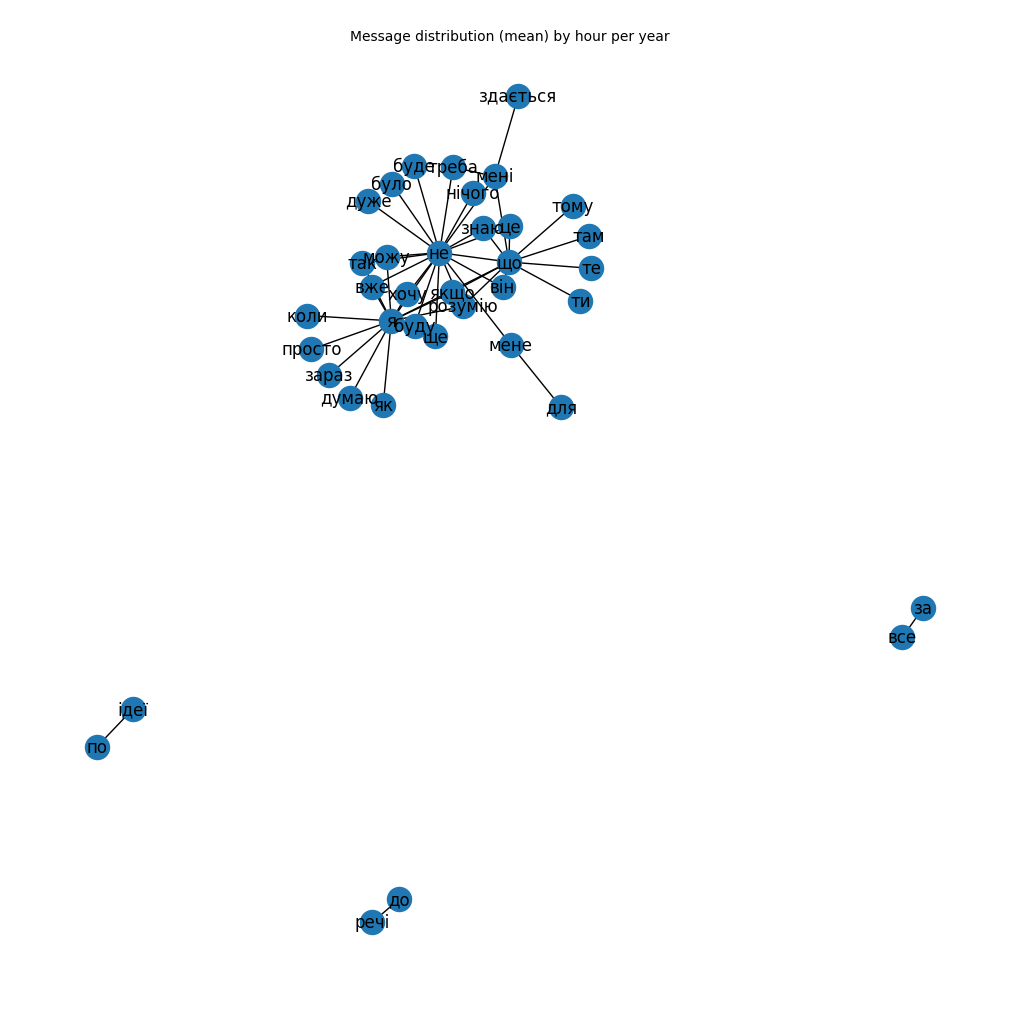

In [62]:
# Build your graph
fig =  plt.figure(figsize=(10,10))
fig.suptitle('Message distribution (mean) by hour per year', fontsize=10)
G=nx.from_pandas_edgelist(df_graph, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

**Результат**: я планувала застосувати на цілому датасеті, але, на жаль, граф малювався занадто довго. Але загалом цікаво, що в топ 60 словосполучень найчастіше зустрічається слово "я" та "не"